# Lezione 8 — Validazione, Overfitting e Generalizzazione

Questa lezione affronta il problema centrale del machine learning supervisionato: come costruire modelli che funzionino su dati mai visti.  
Non basta che un modello sia accurato sui dati di addestramento; ciò che conta è la sua capacità di **generalizzare**.

## Obiettivi della lezione
- Comprendere la differenza tra errore di training e errore di test.
- Capire cosa significa overfitting e perché è il nemico principale di ogni modello.
- Imparare le tecniche di validazione: hold-out split e cross-validation.
- Studiare il trade-off bias/variance e la sua relazione con la complessità del modello.
- Saper riconoscere quando un modello sta memorizzando invece che imparando.

## Cos'è la validazione?

La **validazione** è il processo attraverso cui si valuta la qualità di un modello su dati che non sono stati usati per addestrarlo.  
Un modello viene addestrato su un sottoinsieme dei dati (training set) e poi testato su un altro sottoinsieme (test set o validation set).

Perché è necessario?  
Perché l'obiettivo del machine learning non è spiegare i dati passati, ma **prevedere dati futuri**.

## Perché l'accuracy sul training non basta?

L'accuratezza calcolata sui dati di training misura quanto bene il modello si adatta ai dati che ha già visto.  
Un modello può raggiungere accuratezza perfetta sul training semplicemente **memorizzando** ogni esempio.

Questo è un problema perché:
- i dati di training contengono rumore (errori di misurazione, variabilità casuale);
- memorizzare il rumore non aiuta a fare previsioni corrette su nuovi dati;
- un modello che memorizza non ha imparato la struttura sottostante del problema.

## Cosa significa generalizzare?

Un modello **generalizza** quando riesce a fare previsioni accurate su dati che non ha mai visto durante l'addestramento.

La generalizzazione richiede che il modello abbia catturato il **pattern reale** nei dati, non le particolarità specifiche del campione di training.

Esempio concreto:  
Se un modello impara a riconoscere i cani, deve funzionare su foto di cani mai viste prima, non solo su quelle usate per l'addestramento.

## Perché l'overfitting è il problema centrale del ML supervisionato?

L'**overfitting** si verifica quando un modello si adatta troppo ai dati di training, catturando anche il rumore e le peculiarità casuali.

Conseguenze dell'overfitting:
- accuratezza molto alta sul training;
- accuratezza significativamente più bassa sul test;
- il modello non è utilizzabile in produzione.

L'overfitting è il problema centrale perché:
1. è facile da ottenere (basta aumentare la complessità del modello);
2. è difficile da rilevare senza una strategia di validazione;
3. rende il modello inutile per lo scopo per cui è stato costruito.

Tutta la teoria della validazione, della regolarizzazione e della selezione dei modelli ruota attorno alla prevenzione e al rilevamento dell'overfitting.

# Section 2 — Training Error vs Test Error

Questa sezione introduce la distinzione fondamentale tra due tipi di errore che caratterizzano ogni modello di machine learning.

---

## 2.1 Errore sul Training (Training Error)

L'**errore di training** è l'errore commesso dal modello sui dati usati per addestrarlo.

Definizione formale:

$$
\text{Training Error} = \frac{1}{n_{\text{train}}} \sum_{i=1}^{n_{\text{train}}} L(y_i, \hat{y}_i)
$$

dove:
- $L$ è la funzione di perdita (es. errore quadratico, log-loss, 0-1 loss);
- $y_i$ è il valore reale;
- $\hat{y}_i$ è la previsione del modello.

L'errore di training misura quanto bene il modello si adatta ai dati che ha già visto.  
È sempre possibile ridurre l'errore di training aumentando la complessità del modello.

---

## 2.2 Errore sul Test (Test Error)

L'**errore di test** è l'errore commesso dal modello su dati **mai visti** durante l'addestramento.

$$
\text{Test Error} = \frac{1}{n_{\text{test}}} \sum_{i=1}^{n_{\text{test}}} L(y_i, \hat{y}_i)
$$

L'errore di test è ciò che ci interessa veramente, perché rappresenta come il modello si comporterà su nuovi dati nel mondo reale.

Punto chiave:  
**Un modello è buono solo se ha un basso errore di test**, non di training.

---

## 2.3 Perché un modello può "imparare a memoria"

Consideriamo un modello molto flessibile, ad esempio un albero decisionale senza limiti di profondità.

Questo modello può:
- creare una regola specifica per ogni singolo punto del training set;
- assegnare a ogni esempio la sua etichetta corretta;
- raggiungere errore di training pari a zero.

Ma cosa succede su nuovi dati?  
Le regole specifiche create per i punti di training non si applicano ai nuovi esempi.  
Il modello ha **memorizzato** invece che **imparato**.

Memorizzare significa:
- catturare le particolarità casuali del training set;
- non estrarre il pattern generale sottostante;
- fallire completamente su dati nuovi.

---

## 2.4 Underfitting, Good Fit, Overfitting

Esistono tre regimi fondamentali che descrivono il comportamento di un modello:

### Underfitting
- Il modello è troppo semplice per catturare il pattern nei dati.
- Errore di training alto.
- Errore di test alto.
- Il modello non ha abbastanza capacità espressiva.

Esempio: usare una retta per dati con relazione quadratica.

### Good Fit (Generalizzazione ottimale)
- Il modello cattura il pattern reale senza adattarsi al rumore.
- Errore di training moderato.
- Errore di test simile all'errore di training.
- Il modello generalizza bene.

### Overfitting
- Il modello è troppo complesso e si adatta anche al rumore.
- Errore di training molto basso (spesso quasi zero).
- Errore di test significativamente più alto dell'errore di training.
- Il modello memorizza invece di imparare.

---

## 2.5 Schema concettuale: Complessità vs Errore

La relazione tra complessità del modello e i due tipi di errore segue un pattern caratteristico:

```
Errore
  ^
  |
  |  *                                    Underfitting
  |   *                                   (modello troppo semplice)
  |    *
  |     *  
  |      *     Test Error
  |       *   /
  |        * /
  |         X  <-- PUNTO OTTIMALE (Good Fit)
  |        / *
  |       /   *
  |      /     *                          Overfitting
  |     /       *                         (modello troppo complesso)
  |    /         *
  |   / Training Error
  |  /
  +-----------------------------------------> Complessità del modello
```

Osservazioni chiave:
1. L'errore di training **diminuisce sempre** all'aumentare della complessità.
2. L'errore di test **prima diminuisce, poi aumenta**.
3. Il punto ottimale è dove l'errore di test è minimo.
4. Oltre quel punto, aumentare la complessità **peggiora** le prestazioni reali.

---

## 2.6 Implicazioni pratiche

Questa struttura implica che:

- Non possiamo valutare un modello solo sull'errore di training.
- Dobbiamo sempre riservare dati per la validazione.
- La complessità del modello deve essere calibrata, non massimizzata.
- Esiste un trade-off intrinseco tra adattamento ai dati e generalizzazione.

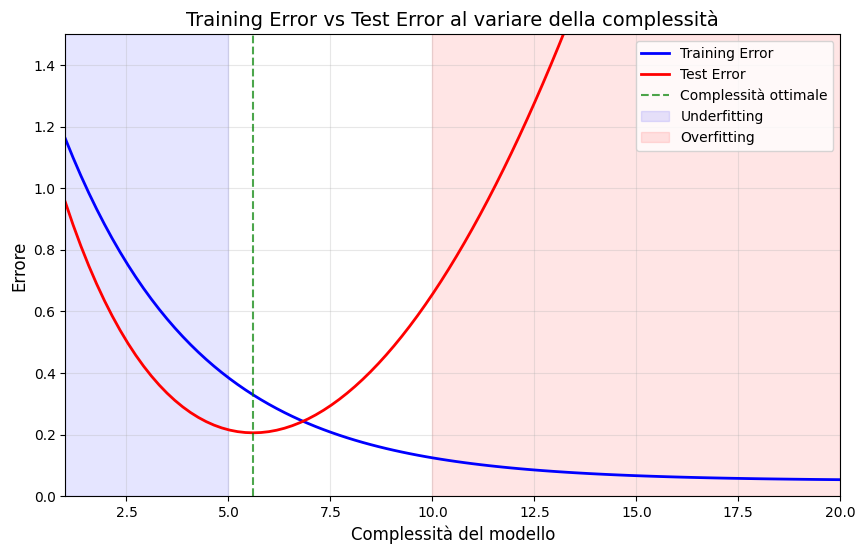

In [1]:
# Visualizzazione del concetto: Training Error vs Test Error
# Questo grafico mostra come i due errori si comportano al variare della complessità

import numpy as np
import matplotlib.pyplot as plt

# Simuliamo il comportamento tipico
complexity = np.linspace(1, 20, 100)

# Training error: diminuisce sempre con la complessità
train_error = 1.5 * np.exp(-0.3 * complexity) + 0.05

# Test error: prima diminuisce, poi aumenta (forma a U)
test_error = 0.8 * np.exp(-0.5 * complexity) + 0.02 * (complexity - 5)**2 + 0.15

plt.figure(figsize=(10, 6))
plt.plot(complexity, train_error, 'b-', linewidth=2, label='Training Error')
plt.plot(complexity, test_error, 'r-', linewidth=2, label='Test Error')

# Punto ottimale
optimal_idx = np.argmin(test_error)
plt.axvline(x=complexity[optimal_idx], color='green', linestyle='--', alpha=0.7, label='Complessità ottimale')

# Zone
plt.axvspan(1, 5, alpha=0.1, color='blue', label='Underfitting')
plt.axvspan(10, 20, alpha=0.1, color='red', label='Overfitting')

plt.xlabel('Complessità del modello', fontsize=12)
plt.ylabel('Errore', fontsize=12)
plt.title('Training Error vs Test Error al variare della complessità', fontsize=14)
plt.legend(loc='upper right')
plt.grid(True, alpha=0.3)
plt.xlim(1, 20)
plt.ylim(0, 1.5)
plt.show()

# Section 3 — Overfitting: Spiegazione Meccanica

L'overfitting non è un concetto astratto: ha cause precise e meccanismi identificabili.  
Questa sezione spiega in dettaglio **perché** e **come** un modello finisce per memorizzare invece che imparare.

---

## 3.1 Cosa significa "imparare il rumore"

Ogni dataset reale contiene due componenti:

1. **Segnale**: il pattern vero, la relazione sottostante tra feature e target.
2. **Rumore**: variabilità casuale, errori di misurazione, eccezioni non rappresentative.

$$
y = f(x) + \epsilon
$$

dove:
- $f(x)$ è la funzione vera (segnale);
- $\epsilon$ è il rumore (termine casuale con media zero).

Un modello ideale dovrebbe approssimare $f(x)$ e ignorare $\epsilon$.

Tuttavia, un modello troppo flessibile può adattarsi sia al segnale che al rumore.  
Quando il modello "impara" anche $\epsilon$, sta memorizzando particolarità del training set che non si ripeteranno nei nuovi dati.

---

## 3.2 Perché i modelli troppo flessibili overfittano

La **flessibilità** di un modello indica quante diverse funzioni può rappresentare.

Modelli più flessibili hanno:
- più parametri liberi;
- capacità di creare confini di decisione più complessi;
- potenza espressiva maggiore.

Il problema è che questa flessibilità può essere usata per:
- catturare il pattern reale (bene);
- adattarsi al rumore specifico del training set (male).

Esempio intuitivo:
- Una retta (2 parametri) può solo "tirare" una linea attraverso i dati.
- Un polinomio di grado 100 può passare esattamente per ogni punto, seguendo ogni oscillazione casuale.

Più il modello è flessibile, più è facile che usi la sua capacità per memorizzare.

---

## 3.3 Ruolo del numero di parametri

Il numero di parametri è un indicatore approssimativo della complessità del modello:

| Modello | Parametri tipici | Rischio overfitting |
|---------|-----------------|---------------------|
| Regressione lineare | $d + 1$ (feature + intercetta) | Basso |
| Albero decisionale profondo | Molti (uno per split) | Alto |
| k-NN con k=1 | Nessuno esplicito, ma memorizza tutto | Molto alto |
| Rete neurale profonda | Migliaia o milioni | Molto alto |

Regola generale:  
**Più parametri = più capacità = più rischio di overfitting**.

Ma attenzione: il numero di parametri non è l'unico fattore.  
Anche modelli con pochi parametri possono overfittare se i dati sono pochi.

---

## 3.4 Relazione con la dimensione del dataset

La quantità di dati disponibili è cruciale:

$$
\text{Rischio overfitting} \propto \frac{\text{Complessità del modello}}{\text{Dimensione del dataset}}
$$

Implicazioni pratiche:

- **Pochi dati + modello complesso** = overfitting quasi garantito.
- **Molti dati + modello complesso** = il modello può esprimere la sua capacità senza memorizzare.
- **Pochi dati + modello semplice** = rischio di underfitting, ma almeno generalizza.

Questo spiega perché:
- con dataset piccoli si preferiscono modelli semplici o regolarizzati;
- con big data si possono usare modelli molto complessi (deep learning).

---

## 3.5 Overfitting nei modelli lineari

I modelli lineari (regressione lineare, logistic regression) hanno capacità limitata:

- Il confine di decisione è sempre un iperpiano.
- Non possono catturare relazioni non lineari complesse.
- Tendono all'**underfitting** piuttosto che all'overfitting.

Tuttavia, possono overfittare quando:
- ci sono molte feature rispetto al numero di osservazioni;
- le feature sono fortemente correlate (collinearità);
- non si usa regolarizzazione.

La regolarizzazione (L1, L2, Elastic Net) controlla la complessità effettiva del modello lineare.

---

## 3.6 Overfitting nei modelli tree-based

Gli alberi decisionali sono particolarmente inclini all'overfitting:

- Senza limiti, un albero può creare una foglia per ogni esempio.
- Ogni foglia memorizza l'etichetta del singolo punto.
- L'errore di training diventa zero, ma l'errore di test esplode.

Meccanismo:
```
Albero profondo:
├── Se x1 > 3.2 e x2 < 1.7 e x3 > 0.5 → classe 1  (un solo punto!)
├── Se x1 > 3.2 e x2 < 1.7 e x3 ≤ 0.5 → classe 0  (un solo punto!)
└── ...
```

Ogni percorso diventa una regola che identifica un singolo esempio.

Soluzioni:
- limitare la profondità massima (`max_depth`);
- richiedere un numero minimo di campioni per split (`min_samples_split`);
- usare ensemble (Random Forest, Gradient Boosting).

---

## 3.7 Overfitting nel k-NN

Il k-Nearest Neighbors ha un comportamento peculiare:

**k piccolo (es. k=1)**:
- La previsione dipende solo dal vicino più prossimo.
- Ogni punto del training set ha influenza massima sul suo intorno.
- Il modello segue ogni oscillazione locale → overfitting.

**k grande (es. k=n)**:
- La previsione è la media/moda di tutti i punti.
- Il modello ignora la struttura locale → underfitting.

Il valore ottimale di k bilancia:
- sensibilità alla struttura locale (k piccolo);
- robustezza al rumore (k grande).

Tipicamente k ottimale: $\sqrt{n}$ come punto di partenza.

---

## 3.8 Segnali pratici dell'overfitting

Come riconoscere l'overfitting nella pratica:

| Indicatore | Significato |
|------------|-------------|
| Train accuracy >> Test accuracy | Gap classico dell'overfitting |
| Train loss ≈ 0 | Il modello ha memorizzato |
| Coefficienti molto grandi | Modello instabile |
| Prestazioni molto variabili tra fold | Alta varianza |
| Confini di decisione troppo complessi | Adattamento al rumore |

---

## 3.9 Metodo di pensiero per diagnosticare l'overfitting

### Metodo 1 — Confrontare sempre train e test
Se c'è un gap significativo, c'è overfitting.

### Metodo 2 — Aumentare la regolarizzazione o ridurre la complessità
Se le prestazioni sul test migliorano, l'overfitting era presente.

### Metodo 3 — Aggiungere più dati (se possibile)
Più dati rendono più difficile per il modello memorizzare.

# Section 4 — Hold-out Validation (Train/Test Split)

La tecnica più semplice per valutare la capacità di generalizzazione di un modello è separare i dati in due parti: una per addestrare, una per testare.

---

## 4.1 Perché separiamo i dati

L'idea fondamentale è:

> Se vogliamo sapere come il modello si comporterà su dati futuri, dobbiamo testarlo su dati che non ha mai visto.

Dividere i dati permette di:
- simulare l'arrivo di nuovi dati;
- ottenere una stima realistica dell'errore di generalizzazione;
- rilevare l'overfitting confrontando training e test performance.

Schema del processo:
```
Dataset completo
       ↓
   ┌───────────────┬───────────────┐
   │  Training Set │   Test Set    │
   │    (70-80%)   │   (20-30%)    │
   └───────────────┴───────────────┘
          ↓                ↓
    Addestramento    Valutazione finale
```

---

## 4.2 Cosa significa leakage (data leakage)

Il **data leakage** si verifica quando informazioni dal test set "contaminano" il processo di addestramento.

Esempi di leakage:

1. **Feature leakage**: usare feature che contengono informazioni sul target non disponibili al momento della previsione.

2. **Training leakage**: calcolare statistiche (media, deviazione standard) sull'intero dataset prima dello split.

3. **Temporal leakage**: in dati temporali, usare informazioni future per prevedere il passato.

Conseguenze del leakage:
- prestazioni gonfiate artificialmente;
- il modello sembra funzionare bene ma fallisce in produzione;
- risultati non riproducibili.

Regola fondamentale:  
**Il test set deve essere trattato come se non esistesse fino alla valutazione finale.**

---

## 4.3 Ruolo di random_state

La funzione `train_test_split` divide i dati in modo casuale.  
Il parametro `random_state` controlla il seed del generatore casuale.

Perché è importante:
- **Riproducibilità**: stesso seed → stesso split → risultati replicabili.
- **Confronti equi**: per confrontare modelli diversi, devono essere valutati sullo stesso split.
- **Debug**: permette di riprodurre esattamente un esperimento.

```python
# Split riproducibile
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
```

Nota: il valore specifico (42, 0, 123...) non importa; ciò che conta è usare sempre lo stesso.

---

## 4.4 Perché lo split va fatto PRIMA dello scaling

Questo è un errore comune e molto pericoloso.

**Sbagliato:**
```python
# ERRORE: scaling prima dello split
scaler.fit(X)           # Calcola media e std su TUTTI i dati
X_scaled = scaler.transform(X)
X_train, X_test = train_test_split(X_scaled, ...)
```

**Corretto:**
```python
# CORRETTO: split prima, poi scaling solo sul train
X_train, X_test = train_test_split(X, ...)
scaler.fit(X_train)     # Calcola media e std solo sul TRAIN
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)  # Usa i parametri del train
```

Perché è importante:
- Se calcoli media e std sull'intero dataset, il test set influenza lo scaling.
- Questo introduce **leakage**: stai usando informazioni dal test durante l'addestramento.
- Le prestazioni saranno gonfiate e non realistiche.

Regola:  
**fit() solo sul training set, transform() su entrambi.**

---

## 4.5 Limitazioni del singolo split

L'hold-out validation ha alcuni problemi:

1. **Dipendenza dallo split**: un diverso split casuale può dare risultati diversi.

2. **Perdita di dati**: il 20-30% dei dati non viene usato per l'addestramento.

3. **Varianza alta**: con dataset piccoli, la stima dell'errore è molto rumorosa.

4. **Un solo punto dati**: otteniamo una singola stima dell'errore, senza misura di incertezza.

Queste limitazioni motivano l'uso della **cross-validation** (sezione successiva).

In [2]:
# Esempio dimostrativo: Train/Test Split e confronto delle performance

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Generazione dataset sintetico
np.random.seed(42)
X, y = make_classification(
    n_samples=500,
    n_features=10,
    n_informative=5,
    n_redundant=2,
    n_clusters_per_class=2,
    random_state=42
)

print(f"Dimensione dataset: {X.shape}")
print(f"Distribuzione classi: {np.bincount(y)}")

# PASSO 1: Split PRIMA di qualsiasi preprocessing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.25, 
    stratify=y,        # Mantiene la proporzione delle classi
    random_state=42
)

print(f"\nTraining set: {X_train.shape[0]} campioni")
print(f"Test set: {X_test.shape[0]} campioni")

# PASSO 2: Scaling - fit solo sul train!
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # fit + transform sul train
X_test_scaled = scaler.transform(X_test)         # solo transform sul test

# PASSO 3: Addestramento e valutazione di due modelli

# Modello 1: Logistic Regression (modello semplice)
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train_scaled, y_train)

lr_train_acc = accuracy_score(y_train, lr.predict(X_train_scaled))
lr_test_acc = accuracy_score(y_test, lr.predict(X_test_scaled))

# Modello 2: Decision Tree senza limiti (modello complesso)
dt_deep = DecisionTreeClassifier(random_state=42)  # nessun limite di profondità
dt_deep.fit(X_train_scaled, y_train)

dt_train_acc = accuracy_score(y_train, dt_deep.predict(X_train_scaled))
dt_test_acc = accuracy_score(y_test, dt_deep.predict(X_test_scaled))

# Risultati
print("\n" + "="*50)
print("RISULTATI - CONFRONTO TRAIN vs TEST ACCURACY")
print("="*50)
print(f"\nLogistic Regression:")
print(f"  Training Accuracy: {lr_train_acc:.3f}")
print(f"  Test Accuracy:     {lr_test_acc:.3f}")
print(f"  Gap:               {lr_train_acc - lr_test_acc:.3f}")

print(f"\nDecision Tree (profondità illimitata):")
print(f"  Training Accuracy: {dt_train_acc:.3f}")
print(f"  Test Accuracy:     {dt_test_acc:.3f}")
print(f"  Gap:               {dt_train_acc - dt_test_acc:.3f}")

print("\n" + "="*50)
print("INTERPRETAZIONE")
print("="*50)
if dt_train_acc - dt_test_acc > 0.1:
    print("⚠️  Il Decision Tree mostra un gap significativo tra train e test.")
    print("    Questo è un chiaro segnale di OVERFITTING.")
    print("    Il modello ha memorizzato i dati di training.")

Dimensione dataset: (500, 10)
Distribuzione classi: [249 251]

Training set: 375 campioni
Test set: 125 campioni

RISULTATI - CONFRONTO TRAIN vs TEST ACCURACY

Logistic Regression:
  Training Accuracy: 0.856
  Test Accuracy:     0.832
  Gap:               0.024

Decision Tree (profondità illimitata):
  Training Accuracy: 1.000
  Test Accuracy:     0.880
  Gap:               0.120

INTERPRETAZIONE
⚠️  Il Decision Tree mostra un gap significativo tra train e test.
    Questo è un chiaro segnale di OVERFITTING.
    Il modello ha memorizzato i dati di training.


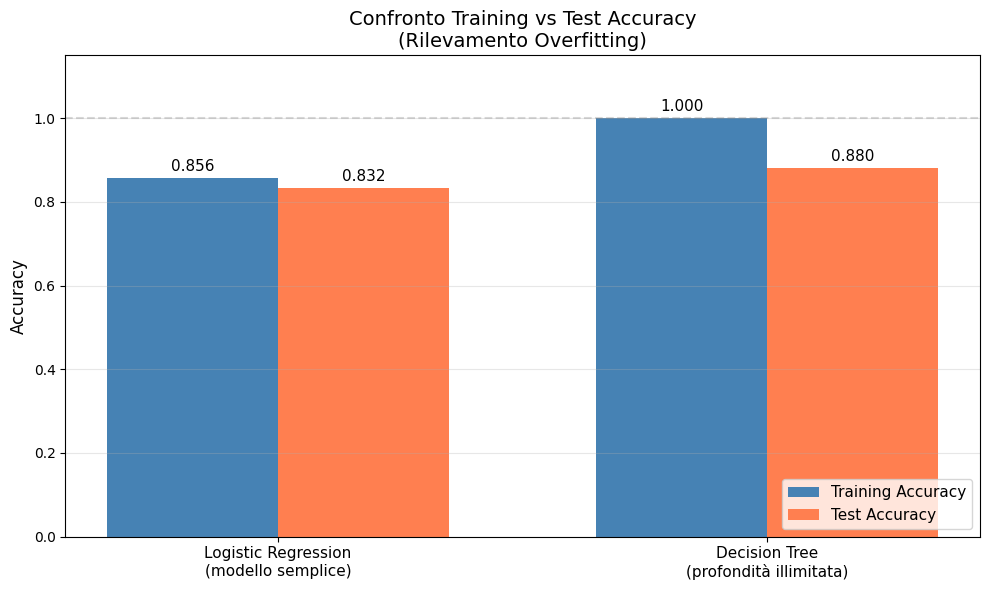


OSSERVAZIONE:
Il Decision Tree ha accuracy perfetta sul training (ha memorizzato tutto)
ma performance significativamente peggiore sul test (non generalizza).


In [3]:
# Visualizzazione del confronto

fig, ax = plt.subplots(figsize=(10, 6))

models = ['Logistic Regression\n(modello semplice)', 'Decision Tree\n(profondità illimitata)']
train_scores = [lr_train_acc, dt_train_acc]
test_scores = [lr_test_acc, dt_test_acc]

x = np.arange(len(models))
width = 0.35

bars1 = ax.bar(x - width/2, train_scores, width, label='Training Accuracy', color='steelblue')
bars2 = ax.bar(x + width/2, test_scores, width, label='Test Accuracy', color='coral')

# Aggiungi valori sopra le barre
for bar in bars1:
    height = bar.get_height()
    ax.annotate(f'{height:.3f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom', fontsize=11)

for bar in bars2:
    height = bar.get_height()
    ax.annotate(f'{height:.3f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom', fontsize=11)

ax.set_ylabel('Accuracy', fontsize=12)
ax.set_title('Confronto Training vs Test Accuracy\n(Rilevamento Overfitting)', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(models, fontsize=11)
ax.legend(loc='lower right', fontsize=11)
ax.set_ylim(0, 1.15)
ax.axhline(y=1.0, color='gray', linestyle='--', alpha=0.3)
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("\nOSSERVAZIONE:")
print("Il Decision Tree ha accuracy perfetta sul training (ha memorizzato tutto)")
print("ma performance significativamente peggiore sul test (non generalizza).")

# Section 5 — Cross Validation (K-Fold)

L'hold-out validation ha una limitazione importante: il risultato dipende da quale particolare split viene scelto.  
La **K-Fold Cross Validation** risolve questo problema utilizzando tutti i dati sia per il training che per la validazione, in modo sistematico.

---

## 5.1 Perché il singolo split è instabile

Con un singolo train/test split:

- Alcuni esempi finiscono sempre nel training, altri sempre nel test.
- Se il test set contiene casualmente esempi più facili o più difficili, la stima è distorta.
- Con dataset piccoli, la variabilità è molto alta.

Esempio pratico:  
Con 100 campioni e 20% di test, il test set ha solo 20 esempi.  
Bastano pochi esempi anomali per spostare significativamente l'accuracy stimata.

---

## 5.2 Idea di K-Fold Cross Validation

La K-Fold Cross Validation divide il dataset in K parti (fold) uguali.

Procedura:
1. Dividi i dati in K fold.
2. Per ogni fold $i$ da 1 a K:
   - Usa il fold $i$ come test set.
   - Usa gli altri K-1 fold come training set.
   - Addestra il modello e calcola la metrica sul fold $i$.
3. Calcola la media e la deviazione standard delle K metriche ottenute.

Schema visivo (K=5):
```
Fold 1: [TEST] [Train] [Train] [Train] [Train]
Fold 2: [Train] [TEST] [Train] [Train] [Train]
Fold 3: [Train] [Train] [TEST] [Train] [Train]
Fold 4: [Train] [Train] [Train] [TEST] [Train]
Fold 5: [Train] [Train] [Train] [Train] [TEST]
```

Vantaggi:
- Ogni esempio viene usato esattamente una volta come test.
- La stima dell'errore è più stabile (media di K valori).
- Si ottiene anche una misura di incertezza (deviazione standard).

---

## 5.3 Bias/Variance Trade-off nella scelta di K

La scelta di K influenza la qualità della stima:

### K piccolo (es. K=2)
- Training set: 50% dei dati → modello addestrato su pochi dati.
- Bias alto: il modello sottoperforma rispetto a uno addestrato su tutti i dati.
- Varianza bassa: solo 2 valutazioni.
- Computazionalmente veloce.

### K grande (es. K=n, Leave-One-Out)
- Training set: n-1 esempi → quasi tutti i dati.
- Bias basso: il modello è simile a quello addestrato su tutto.
- Varianza alta: ogni fold ha un solo esempio, i risultati variano molto.
- Computazionalmente costoso.

### K tipico (K=5 o K=10)
- Buon compromesso tra bias e varianza.
- Training set sufficientemente grande.
- Abbastanza fold per una stima stabile.
- Standard nella pratica.

Regola pratica:
- K=5: buono per dataset medio-grandi.
- K=10: standard, buon equilibrio.
- Leave-One-Out: solo per dataset molto piccoli.

---

## 5.4 Stratified K-Fold

Quando le classi sono sbilanciate, è importante che ogni fold mantenga la proporzione originale delle classi.

**K-Fold standard**: i fold sono creati in modo casuale, senza considerare le classi.

**Stratified K-Fold**: ogni fold ha (approssimativamente) la stessa proporzione di classi del dataset originale.

Esempio:
```
Dataset: 70% classe 0, 30% classe 1
Stratified Fold 1: ~70% classe 0, ~30% classe 1
Stratified Fold 2: ~70% classe 0, ~30% classe 1
...
```

In scikit-learn, `cross_val_score` usa automaticamente Stratified K-Fold per la classificazione.

---

## 5.5 Interpretazione dei risultati

La cross-validation produce K punteggi. Cosa farne?

**Media**: stima della performance attesa del modello.
$$
\bar{s} = \frac{1}{K} \sum_{i=1}^{K} s_i
$$

**Deviazione standard**: misura della variabilità/instabilità.
$$
\sigma_s = \sqrt{\frac{1}{K-1} \sum_{i=1}^{K} (s_i - \bar{s})^2}
$$

Interpretazione:

| Media | Std | Interpretazione |
|-------|-----|-----------------|
| Alta | Bassa | Modello buono e stabile |
| Alta | Alta | Modello buono ma instabile (attenzione!) |
| Bassa | Bassa | Modello scadente ma consistente |
| Bassa | Alta | Modello scadente e instabile |

Una deviazione standard alta può indicare:
- Dataset troppo piccolo.
- Modello molto sensibile alla composizione del training set.
- Possibile overfitting.

---

## 5.6 Cross-validation e tuning degli iperparametri

La cross-validation è usata anche per scegliere gli iperparametri del modello.

Procedura tipica:
1. Per ogni combinazione di iperparametri:
   - Esegui K-Fold cross-validation.
   - Calcola la media del punteggio.
2. Scegli la combinazione con il punteggio medio migliore.
3. Ri-addestra il modello con quegli iperparametri su tutti i dati di training.

Questo processo è implementato in `GridSearchCV` e `RandomizedSearchCV` di scikit-learn.

Attenzione:  
Se usi cross-validation per scegliere il modello E per valutarlo, stai commettendo un errore.  
Devi tenere un test set finale separato, mai toccato durante il tuning.

In [4]:
# Esempio pratico: K-Fold Cross Validation

from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# Usiamo lo stesso dataset della sezione precedente (X, y già definiti)
# Scaling per un confronto equo
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Definizione dei modelli da confrontare
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree (max_depth=3)': DecisionTreeClassifier(max_depth=3, random_state=42),
    'Decision Tree (illimitato)': DecisionTreeClassifier(random_state=42),
    'k-NN (k=5)': KNeighborsClassifier(n_neighbors=5),
    'k-NN (k=1)': KNeighborsClassifier(n_neighbors=1)
}

# Cross-validation con K=5
K = 5
cv = StratifiedKFold(n_splits=K, shuffle=True, random_state=42)

print("="*70)
print(f"CROSS-VALIDATION CON K={K} FOLD")
print("="*70)
print(f"\n{'Modello':<35} {'Media':<10} {'Std':<10} {'Punteggi per fold'}")
print("-"*70)

results = {}
for name, model in models.items():
    scores = cross_val_score(model, X_scaled, y, cv=cv, scoring='accuracy')
    results[name] = scores
    scores_str = ' '.join([f'{s:.3f}' for s in scores])
    print(f"{name:<35} {scores.mean():.4f}    {scores.std():.4f}    [{scores_str}]")

print("\n" + "="*70)
print("INTERPRETAZIONE")
print("="*70)
print("""
• Il Decision Tree illimitato ha alta varianza tra i fold → instabile.
• k-NN con k=1 mostra alta variabilità → overfitting.
• Logistic Regression e Decision Tree limitato sono più stabili.
• La std alta indica che il modello è sensibile allo split dei dati.
""")

CROSS-VALIDATION CON K=5 FOLD

Modello                             Media      Std        Punteggi per fold
----------------------------------------------------------------------
Logistic Regression                 0.8420    0.0354    [0.820 0.890 0.810 0.880 0.810]
Decision Tree (max_depth=3)         0.8560    0.0102    [0.840 0.870 0.850 0.860 0.860]
Decision Tree (illimitato)          0.8360    0.0338    [0.840 0.860 0.770 0.860 0.850]
k-NN (k=5)                          0.8880    0.0160    [0.870 0.900 0.870 0.910 0.890]
k-NN (k=1)                          0.8660    0.0185    [0.850 0.850 0.870 0.900 0.860]

INTERPRETAZIONE

• Il Decision Tree illimitato ha alta varianza tra i fold → instabile.
• k-NN con k=1 mostra alta variabilità → overfitting.
• Logistic Regression e Decision Tree limitato sono più stabili.
• La std alta indica che il modello è sensibile allo split dei dati.



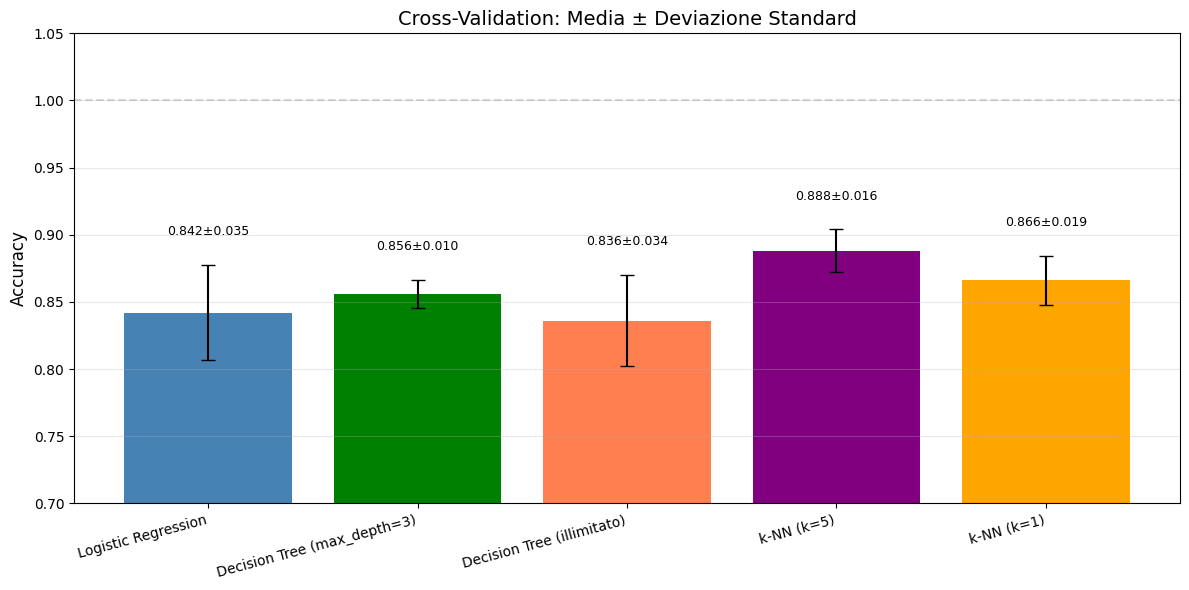

NOTA: Le barre di errore mostrano la deviazione standard.
Barre più lunghe = modello meno stabile attraverso i diversi fold.


In [5]:
# Visualizzazione dei risultati della cross-validation

fig, ax = plt.subplots(figsize=(12, 6))

model_names = list(results.keys())
means = [results[m].mean() for m in model_names]
stds = [results[m].std() for m in model_names]

x = np.arange(len(model_names))
bars = ax.bar(x, means, yerr=stds, capsize=5, color=['steelblue', 'green', 'coral', 'purple', 'orange'])

ax.set_ylabel('Accuracy', fontsize=12)
ax.set_title('Cross-Validation: Media ± Deviazione Standard', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(model_names, rotation=15, ha='right', fontsize=10)
ax.set_ylim(0.7, 1.05)
ax.axhline(y=1.0, color='gray', linestyle='--', alpha=0.3)
ax.grid(axis='y', alpha=0.3)

# Aggiungi valori
for i, (m, s) in enumerate(zip(means, stds)):
    ax.annotate(f'{m:.3f}±{s:.3f}',
                xy=(i, m + s + 0.02),
                ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

print("NOTA: Le barre di errore mostrano la deviazione standard.")
print("Barre più lunghe = modello meno stabile attraverso i diversi fold.")

# Section 6 — Bias / Variance Trade-off

Il trade-off bias/variance è uno dei concetti più fondamentali in machine learning.  
Spiega perché non esiste un modello universalmente migliore e perché la scelta del modello dipende sempre dal problema specifico e dalla quantità di dati disponibili.

---

## 6.1 Cos'è il Bias

Il **bias** è l'errore sistematico introdotto dalle assunzioni semplificative del modello.

Un modello con alto bias:
- fa assunzioni troppo forti sulla forma della funzione da apprendere;
- non riesce a catturare la complessità reale dei dati;
- produce lo stesso tipo di errore indipendentemente dal training set usato.

Esempio:  
Usare una retta per dati che seguono una parabola.  
Non importa quanti dati abbiamo: la retta non può mai rappresentare la parabola.

Matematicamente, il bias misura quanto la previsione media del modello (su diversi training set) si discosta dal valore vero:

$$
\text{Bias}^2 = \mathbb{E}\left[ \hat{f}(x) \right] - f(x) )^2
$$

dove:
- $\hat{f}(x)$ è la previsione del modello;
- $f(x)$ è la funzione vera;
- $\mathbb{E}$ è il valore atteso su diversi training set.

---

## 6.2 Cos'è la Variance

La **variance** misura quanto le previsioni del modello cambiano al variare del training set.

Un modello con alta variance:
- è molto sensibile ai dati specifici su cui è stato addestrato;
- produce previsioni molto diverse con training set diversi;
- si adatta troppo alle particolarità del singolo dataset.

Esempio:  
Un albero decisionale molto profondo che memorizza ogni punto.  
Su un training set diverso, memorizzerà punti diversi e darà previsioni completamente diverse.

Matematicamente:

$$
\text{Variance} = \mathbb{E}\left[ \left( \hat{f}(x) - \mathbb{E}[\hat{f}(x)] \right)^2 \right]
$$

La variance misura la dispersione delle previsioni attorno alla loro media.

---

## 6.3 La decomposizione dell'errore

L'errore di test (errore di generalizzazione) può essere scomposto in tre componenti:

$$
\text{Test Error} = \text{Bias}^2 + \text{Variance} + \text{Rumore irriducibile}
$$

Interpretazione:

- **Bias²**: errore dovuto alle assunzioni del modello. Non diminuisce con più dati.
- **Variance**: errore dovuto alla sensibilità al training set. Diminuisce con più dati.
- **Rumore irriducibile**: variabilità intrinseca nei dati. Non può essere eliminato.

---

## 6.4 Il Trade-off

Esiste un trade-off fondamentale:

| Complessità | Bias | Variance | Rischio |
|-------------|------|----------|---------|
| Bassa (modello semplice) | Alto | Bassa | Underfitting |
| Alta (modello complesso) | Basso | Alta | Overfitting |
| Ottimale | Medio | Media | Generalizzazione |

Visualizzazione:
```
Errore
   ^
   |                    Errore totale
   |    *                   /
   |     *                 /
   |      *               /
   |       *             /
   |        *    ___----*
   |         *--*       
   |         *   Varianza
   |        /           \
   |       /             *
   |      /               *
   |     /    Bias²        *
   |    *                   *
   +---------------------------------> Complessità
```

- Il bias diminuisce con la complessità.
- La variance aumenta con la complessità.
- L'errore totale ha un minimo in un punto intermedio.

---

## 6.5 Come si manifesta in pratica

### Alto Bias (Underfitting)
- Training error alto.
- Test error alto (simile al training error).
- Il modello è troppo semplice.
- Soluzione: aumentare la complessità, aggiungere feature, usare modelli più potenti.

### Alta Variance (Overfitting)
- Training error basso (spesso ~0).
- Test error molto più alto del training error.
- Il modello è troppo complesso.
- Soluzione: ridurre la complessità, regolarizzare, aggiungere più dati.

---

## 6.6 Collegamento ai modelli

### Modelli semplici (alto bias, bassa variance)
- Regressione lineare.
- Logistic regression.
- Naive Bayes.
- k-NN con k grande.
- Alberi poco profondi.

Caratteristiche: robusti, stabili, ma potenzialmente inadeguati per pattern complessi.

### Modelli complessi (basso bias, alta variance)
- Alberi profondi.
- k-NN con k piccolo.
- Reti neurali profonde.
- Modelli non regolarizzati.

Caratteristiche: flessibili, potenti, ma rischiosi con pochi dati.

### Compromesso (ensemble e regolarizzazione)
- Random Forest (media di molti alberi → riduce variance).
- Gradient Boosting (costruzione incrementale → bilancia bias/variance).
- Regolarizzazione L1/L2 (limita la complessità effettiva).

---

## 6.7 Ruolo della dimensione del dataset

La quantità di dati influenza direttamente il trade-off:

**Pochi dati:**
- La variance domina perché il modello può adattarsi troppo al campione.
- Conviene usare modelli semplici o fortemente regolarizzati.
- L'overfitting è il rischio principale.

**Molti dati:**
- La variance diminuisce (più dati = stime più stabili).
- Si possono usare modelli più complessi senza overfittare.
- Il bias diventa il fattore limitante.

Regola pratica:

$$
\text{Complessità ottimale} \propto \sqrt{n}
$$

dove $n$ è il numero di campioni.

---

## 6.8 Metodo di pensiero per il trade-off

### Metodo 1 — Diagnostica basata sul gap
- Gap piccolo + errori alti → bias alto → aumenta complessità.
- Gap grande + training error basso → variance alta → riduci complessità.

### Metodo 2 — Learning curves
Plotta training error e validation error al variare della dimensione del training set.
- Se convergono a un valore alto → bias.
- Se rimangono separati → variance.

### Metodo 3 — Confronto di modelli
Confronta modelli con complessità crescente.
Il modello migliore è quello dove il test error è minimo, non dove il training error è minimo.

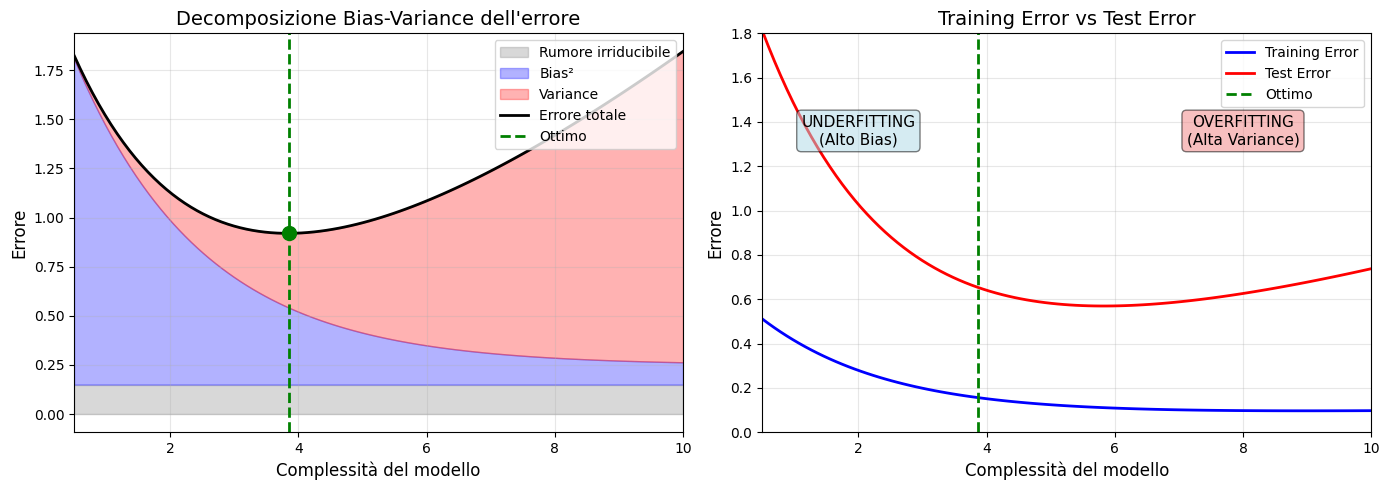


OSSERVAZIONE CHIAVE:
• A sinistra: modelli troppo semplici (alto bias, errori alti per tutti)
• A destra: modelli troppo complessi (alta variance, gap tra train e test)
• Il punto ottimale bilancia bias e variance per minimizzare l'errore totale


In [6]:
# Visualizzazione del trade-off Bias/Variance

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Grafico 1: Decomposizione dell'errore
complexity = np.linspace(0.5, 10, 100)

# Simulazione delle componenti
bias_squared = 2 * np.exp(-0.5 * complexity) + 0.1
variance = 0.05 * complexity**1.5
noise = 0.15 * np.ones_like(complexity)
total_error = bias_squared + variance + noise

ax1 = axes[0]
ax1.fill_between(complexity, 0, noise, alpha=0.3, color='gray', label='Rumore irriducibile')
ax1.fill_between(complexity, noise, noise + bias_squared, alpha=0.3, color='blue', label='Bias²')
ax1.fill_between(complexity, noise + bias_squared, total_error, alpha=0.3, color='red', label='Variance')
ax1.plot(complexity, total_error, 'k-', linewidth=2, label='Errore totale')

# Punto ottimale
optimal_idx = np.argmin(total_error)
ax1.axvline(x=complexity[optimal_idx], color='green', linestyle='--', linewidth=2, label='Ottimo')
ax1.scatter([complexity[optimal_idx]], [total_error[optimal_idx]], color='green', s=100, zorder=5)

ax1.set_xlabel('Complessità del modello', fontsize=12)
ax1.set_ylabel('Errore', fontsize=12)
ax1.set_title('Decomposizione Bias-Variance dell\'errore', fontsize=14)
ax1.legend(loc='upper right')
ax1.grid(True, alpha=0.3)
ax1.set_xlim(0.5, 10)

# Grafico 2: Training vs Test Error
ax2 = axes[1]
train_error = bias_squared * 0.3 + 0.02 * complexity**0.5
test_error = bias_squared + 0.3 * variance + noise

ax2.plot(complexity, train_error, 'b-', linewidth=2, label='Training Error')
ax2.plot(complexity, test_error, 'r-', linewidth=2, label='Test Error')
ax2.axvline(x=complexity[optimal_idx], color='green', linestyle='--', linewidth=2, label='Ottimo')

# Annotazioni zone
ax2.annotate('UNDERFITTING\n(Alto Bias)', xy=(2, 1.3), fontsize=11, ha='center',
            bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.5))
ax2.annotate('OVERFITTING\n(Alta Variance)', xy=(8, 1.3), fontsize=11, ha='center',
            bbox=dict(boxstyle='round', facecolor='lightcoral', alpha=0.5))

ax2.set_xlabel('Complessità del modello', fontsize=12)
ax2.set_ylabel('Errore', fontsize=12)
ax2.set_title('Training Error vs Test Error', fontsize=14)
ax2.legend(loc='upper right')
ax2.grid(True, alpha=0.3)
ax2.set_xlim(0.5, 10)
ax2.set_ylim(0, 1.8)

plt.tight_layout()
plt.show()

print("\nOSSERVAZIONE CHIAVE:")
print("• A sinistra: modelli troppo semplici (alto bias, errori alti per tutti)")
print("• A destra: modelli troppo complessi (alta variance, gap tra train e test)")
print("• Il punto ottimale bilancia bias e variance per minimizzare l'errore totale")

# Section 7 — Dimostrazione Guidata: Complessità e Overfitting

Questa sezione presenta una dimostrazione pratica completa del fenomeno dell'overfitting.  
Useremo lo stesso dataset e varieremo la complessità del modello per osservare come cambiano training error e validation error.

---

## 7.1 Obiettivo della dimostrazione

Vogliamo osservare empiricamente:
1. Come il training score aumenta sempre con la complessità.
2. Come il validation score prima migliora e poi peggiora.
3. Dove si trova il punto ottimale.
4. Come identificare overfitting dai grafici.

---

## 7.2 Setup dell'esperimento

Useremo:
- Un dataset sintetico di classificazione.
- Decision Tree con profondità crescente (da 1 a 20).
- Cross-validation per stimare il validation score.
- Training score calcolato sullo stesso training set.

In [7]:
# Dimostrazione: Decision Tree con profondità crescente

from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings('ignore')

# Generazione dataset più grande per una dimostrazione chiara
X_demo, y_demo = make_classification(
    n_samples=1000,
    n_features=20,
    n_informative=10,
    n_redundant=5,
    n_clusters_per_class=3,
    flip_y=0.1,  # 10% di rumore nelle etichette
    random_state=42
)

print(f"Dataset: {X_demo.shape[0]} campioni, {X_demo.shape[1]} feature")
print(f"Rumore nelle etichette: 10%")
print()

# Range di profondità da testare
depths = range(1, 21)

# Liste per memorizzare i risultati
train_scores = []
val_scores = []
val_stds = []

print("Calcolo in corso...")
print("-" * 60)

for depth in depths:
    dt = DecisionTreeClassifier(max_depth=depth, random_state=42)
    
    # Training score (fit su tutto e predict su tutto - solo per confronto!)
    dt.fit(X_demo, y_demo)
    train_acc = dt.score(X_demo, y_demo)
    train_scores.append(train_acc)
    
    # Validation score con cross-validation
    cv_scores = cross_val_score(dt, X_demo, y_demo, cv=5, scoring='accuracy')
    val_scores.append(cv_scores.mean())
    val_stds.append(cv_scores.std())
    
    # Stampa progressiva
    gap = train_acc - cv_scores.mean()
    status = ""
    if gap > 0.1:
        status = "⚠️ OVERFITTING"
    elif train_acc < 0.75:
        status = "📉 UNDERFITTING"
    else:
        status = "✓ OK"
    
    print(f"Depth={depth:2d} | Train={train_acc:.3f} | Val={cv_scores.mean():.3f}±{cv_scores.std():.3f} | Gap={gap:.3f} | {status}")

print("-" * 60)

Dataset: 1000 campioni, 20 feature
Rumore nelle etichette: 10%

Calcolo in corso...
------------------------------------------------------------
Depth= 1 | Train=0.634 | Val=0.620±0.017 | Gap=0.014 | 📉 UNDERFITTING
Depth= 2 | Train=0.690 | Val=0.649±0.013 | Gap=0.041 | 📉 UNDERFITTING
Depth= 3 | Train=0.744 | Val=0.705±0.020 | Gap=0.039 | 📉 UNDERFITTING
Depth= 4 | Train=0.789 | Val=0.712±0.026 | Gap=0.077 | ✓ OK
Depth= 5 | Train=0.826 | Val=0.712±0.024 | Gap=0.114 | ⚠️ OVERFITTING
Depth= 6 | Train=0.856 | Val=0.686±0.029 | Gap=0.170 | ⚠️ OVERFITTING
Depth= 7 | Train=0.885 | Val=0.697±0.023 | Gap=0.188 | ⚠️ OVERFITTING
Depth= 8 | Train=0.912 | Val=0.693±0.025 | Gap=0.219 | ⚠️ OVERFITTING
Depth= 9 | Train=0.938 | Val=0.694±0.022 | Gap=0.244 | ⚠️ OVERFITTING
Depth=10 | Train=0.953 | Val=0.688±0.029 | Gap=0.265 | ⚠️ OVERFITTING
Depth=11 | Train=0.971 | Val=0.677±0.035 | Gap=0.294 | ⚠️ OVERFITTING
Depth=12 | Train=0.980 | Val=0.677±0.037 | Gap=0.303 | ⚠️ OVERFITTING
Depth=13 | Train=0.988 | 

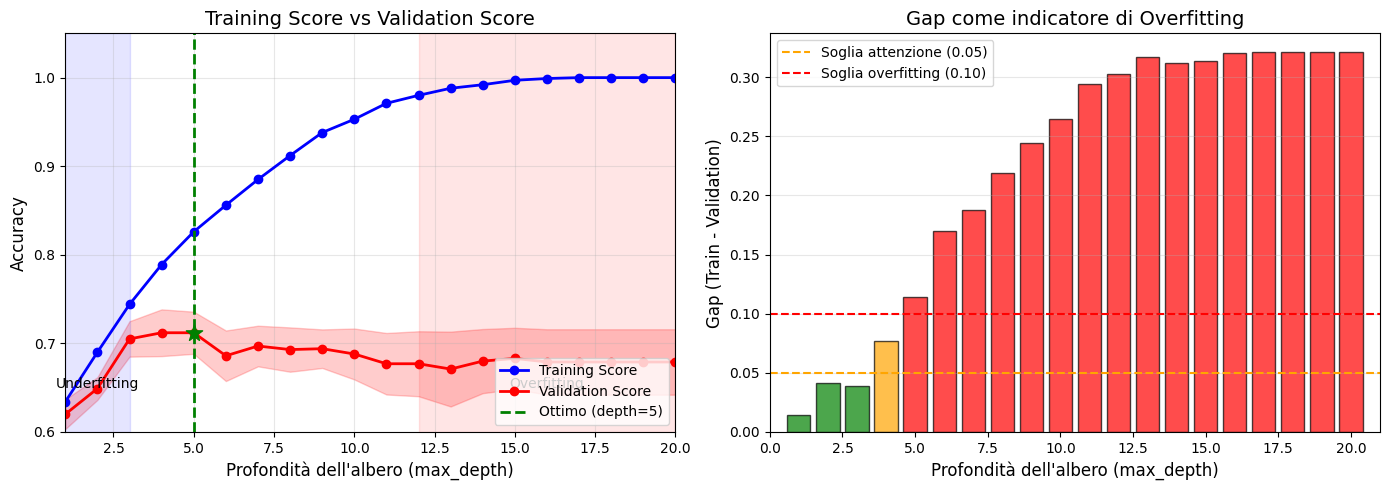


ANALISI DEI RISULTATI
• Profondità ottimale: 5
• Validation score massimo: 0.7120
• Training score a profondità ottimale: 0.8260
• Gap a profondità ottimale: 0.1140

OSSERVAZIONI:
• Il training score cresce monotonamente con la profondità.
• Il validation score cresce, raggiunge un massimo, poi decresce.
• Il gap (differenza) aumenta con la profondità → segnale di overfitting.
• A profondità molto alte, il modello ha 'memorizzato' il training set.


In [8]:
# Visualizzazione della curva Complessità vs Errore

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Grafico 1: Training vs Validation Score
ax1 = axes[0]
ax1.plot(list(depths), train_scores, 'b-o', linewidth=2, markersize=6, label='Training Score')
ax1.plot(list(depths), val_scores, 'r-o', linewidth=2, markersize=6, label='Validation Score')
ax1.fill_between(list(depths), 
                  np.array(val_scores) - np.array(val_stds),
                  np.array(val_scores) + np.array(val_stds),
                  alpha=0.2, color='red')

# Trova la profondità ottimale
optimal_depth = list(depths)[np.argmax(val_scores)]
optimal_val_score = max(val_scores)
ax1.axvline(x=optimal_depth, color='green', linestyle='--', linewidth=2, label=f'Ottimo (depth={optimal_depth})')
ax1.scatter([optimal_depth], [optimal_val_score], color='green', s=150, zorder=5, marker='*')

ax1.set_xlabel('Profondità dell\'albero (max_depth)', fontsize=12)
ax1.set_ylabel('Accuracy', fontsize=12)
ax1.set_title('Training Score vs Validation Score', fontsize=14)
ax1.legend(loc='lower right')
ax1.grid(True, alpha=0.3)
ax1.set_xlim(1, 20)
ax1.set_ylim(0.6, 1.05)

# Zone
ax1.axvspan(1, 3, alpha=0.1, color='blue')
ax1.axvspan(12, 20, alpha=0.1, color='red')
ax1.annotate('Underfitting', xy=(2, 0.65), fontsize=10, ha='center')
ax1.annotate('Overfitting', xy=(16, 0.65), fontsize=10, ha='center')

# Grafico 2: Gap tra Training e Validation
ax2 = axes[1]
gaps = np.array(train_scores) - np.array(val_scores)
colors = ['green' if g < 0.05 else 'orange' if g < 0.1 else 'red' for g in gaps]
ax2.bar(list(depths), gaps, color=colors, edgecolor='black', alpha=0.7)
ax2.axhline(y=0.05, color='orange', linestyle='--', label='Soglia attenzione (0.05)')
ax2.axhline(y=0.1, color='red', linestyle='--', label='Soglia overfitting (0.10)')

ax2.set_xlabel('Profondità dell\'albero (max_depth)', fontsize=12)
ax2.set_ylabel('Gap (Train - Validation)', fontsize=12)
ax2.set_title('Gap come indicatore di Overfitting', fontsize=14)
ax2.legend(loc='upper left')
ax2.grid(True, alpha=0.3, axis='y')
ax2.set_xlim(0, 21)

plt.tight_layout()
plt.show()

print(f"\n{'='*60}")
print("ANALISI DEI RISULTATI")
print(f"{'='*60}")
print(f"• Profondità ottimale: {optimal_depth}")
print(f"• Validation score massimo: {optimal_val_score:.4f}")
print(f"• Training score a profondità ottimale: {train_scores[optimal_depth-1]:.4f}")
print(f"• Gap a profondità ottimale: {gaps[optimal_depth-1]:.4f}")
print()
print("OSSERVAZIONI:")
print("• Il training score cresce monotonamente con la profondità.")
print("• Il validation score cresce, raggiunge un massimo, poi decresce.")
print("• Il gap (differenza) aumenta con la profondità → segnale di overfitting.")
print("• A profondità molto alte, il modello ha 'memorizzato' il training set.")

k-NN: Variazione della complessità tramite k
------------------------------------------------------------
k=  1 | Train=1.000 | Val=0.785±0.044 | Gap=0.215
k=  2 | Train=0.887 | Val=0.767±0.027 | Gap=0.120
k=  3 | Train=0.924 | Val=0.814±0.025 | Gap=0.110
k=  5 | Train=0.889 | Val=0.823±0.021 | Gap=0.066
k=  7 | Train=0.872 | Val=0.815±0.023 | Gap=0.057
k= 10 | Train=0.856 | Val=0.820±0.023 | Gap=0.036
k= 15 | Train=0.866 | Val=0.819±0.029 | Gap=0.047
k= 20 | Train=0.855 | Val=0.830±0.033 | Gap=0.025
k= 30 | Train=0.853 | Val=0.820±0.031 | Gap=0.033
k= 50 | Train=0.832 | Val=0.798±0.024 | Gap=0.034
k= 75 | Train=0.804 | Val=0.783±0.024 | Gap=0.021
k=100 | Train=0.785 | Val=0.779±0.025 | Gap=0.006
------------------------------------------------------------


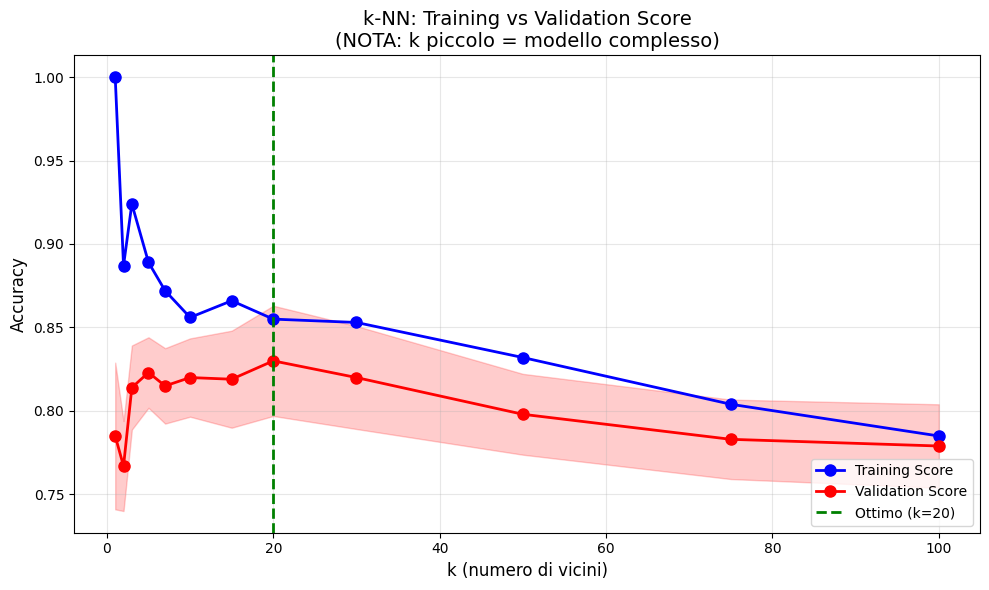


NOTA IMPORTANTE:
Nel k-NN, la complessità è INVERSAMENTE proporzionale a k:
• k=1: il modello considera solo il vicino più prossimo → molto flessibile → overfitting
• k=n: il modello considera tutti i punti → previsione costante → underfitting


In [9]:
# Dimostrazione aggiuntiva: k-NN con diversi valori di k

from sklearn.neighbors import KNeighborsClassifier

# Range di k da testare (nota: k piccolo = modello complesso, k grande = modello semplice)
k_values = [1, 2, 3, 5, 7, 10, 15, 20, 30, 50, 75, 100]

train_scores_knn = []
val_scores_knn = []
val_stds_knn = []

print("k-NN: Variazione della complessità tramite k")
print("-" * 60)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Training score
    knn.fit(X_demo, y_demo)
    train_acc = knn.score(X_demo, y_demo)
    train_scores_knn.append(train_acc)
    
    # Validation score con cross-validation
    cv_scores = cross_val_score(knn, X_demo, y_demo, cv=5, scoring='accuracy')
    val_scores_knn.append(cv_scores.mean())
    val_stds_knn.append(cv_scores.std())
    
    gap = train_acc - cv_scores.mean()
    print(f"k={k:3d} | Train={train_acc:.3f} | Val={cv_scores.mean():.3f}±{cv_scores.std():.3f} | Gap={gap:.3f}")

print("-" * 60)

# Visualizzazione
fig, ax = plt.subplots(figsize=(10, 6))

# NOTA: invertire l'asse x perché k piccolo = alta complessità
ax.plot(k_values, train_scores_knn, 'b-o', linewidth=2, markersize=8, label='Training Score')
ax.plot(k_values, val_scores_knn, 'r-o', linewidth=2, markersize=8, label='Validation Score')
ax.fill_between(k_values, 
                 np.array(val_scores_knn) - np.array(val_stds_knn),
                 np.array(val_scores_knn) + np.array(val_stds_knn),
                 alpha=0.2, color='red')

# Profondità ottimale
optimal_k = k_values[np.argmax(val_scores_knn)]
optimal_val_knn = max(val_scores_knn)
ax.axvline(x=optimal_k, color='green', linestyle='--', linewidth=2, label=f'Ottimo (k={optimal_k})')

ax.set_xlabel('k (numero di vicini)', fontsize=12)
ax.set_ylabel('Accuracy', fontsize=12)
ax.set_title('k-NN: Training vs Validation Score\n(NOTA: k piccolo = modello complesso)', fontsize=14)
ax.legend(loc='lower right')
ax.grid(True, alpha=0.3)

# Annotazioni
ax.annotate('Alta complessità\n(Overfitting)', xy=(3, 0.72), fontsize=10, ha='center',
           bbox=dict(boxstyle='round', facecolor='lightcoral', alpha=0.5))
ax.annotate('Bassa complessità\n(Underfitting)', xy=(80, 0.72), fontsize=10, ha='center',
           bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.5))

plt.tight_layout()
plt.show()

print(f"\nNOTA IMPORTANTE:")
print("Nel k-NN, la complessità è INVERSAMENTE proporzionale a k:")
print("• k=1: il modello considera solo il vicino più prossimo → molto flessibile → overfitting")
print("• k=n: il modello considera tutti i punti → previsione costante → underfitting")

## 7.3 Riepilogo della dimostrazione

Questa dimostrazione ha mostrato empiricamente i concetti teorici delle sezioni precedenti:

### Osservazioni chiave

1. **Training score sempre crescente**
   - Più complessità = migliore adattamento ai dati di training.
   - Il training score non è mai un buon indicatore della qualità del modello.

2. **Validation score con forma a U invertita**
   - Prima aumenta: il modello impara il pattern reale.
   - Poi diminuisce: il modello inizia a memorizzare rumore.
   - Il massimo indica la complessità ottimale.

3. **Il gap come segnale di overfitting**
   - Gap piccolo: il modello generalizza bene.
   - Gap grande: il modello sta overfittando.
   - Monitorare il gap è fondamentale.

4. **Complessità interpretata diversamente**
   - Decision Tree: depth maggiore = più complesso.
   - k-NN: k minore = più complesso.
   - Ogni modello ha i suoi iperparametri di complessità.

### Implicazione pratica

Per scegliere la complessità ottimale:
1. Testare diversi valori dell'iperparametro.
2. Usare cross-validation per stimare la performance.
3. Scegliere il valore che massimizza il validation score.
4. Verificare che il gap non sia eccessivo.

# Section 8 — Esercizi Guidati (Senza Soluzioni)

Gli esercizi seguenti sono progettati per consolidare la comprensione dei concetti di validazione, overfitting e generalizzazione.  
Ogni esercizio presenta una struttura guidata con TODO da completare.

⚠️ **ATTENZIONE**: Le soluzioni NON sono fornite. Devi completare il codice e rispondere alle domande.

---

## Esercizio 8.1 — Rilevare Overfitting su un Dataset Reale

**Obiettivo**: Addestrare un modello su un dataset e determinare se sta overfittando.

**Istruzioni**:
1. Genera un dataset sintetico con rumore.
2. Addestra un Decision Tree senza limiti.
3. Calcola training e test accuracy.
4. Determina se c'è overfitting e spiega perché.

In [11]:
# ESERCIZIO 8.1 — Rilevare Overfitting

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# PASSO 1: Genera un dataset con rumore
# Usa make_classification con flip_y=0.15 per aggiungere rumore
X_ex, y_ex = make_classification(
    n_samples=500,
    n_features=15,
    n_informative=8,
    n_redundant=3,
    flip_y=0.15,  # 15% di rumore
    random_state=42
)

# PASSO 2: Split dei dati
# Dividi i dati in training (75%) e test (25%)
# Usa stratify=y_ex e random_state=42

X_train_ex, X_test_ex, y_train_ex, y_test_ex = train_test_split(
    X_ex, y_ex,
    test_size=0.25,
    stratify=y_ex,
    random_state=42
)

# PASSO 3: Addestra un Decision Tree senza limiti
# Crea un DecisionTreeClassifier senza max_depth (lascia il default)

dt_ex = DecisionTreeClassifier(random_state=42)

# Addestra il modello sul training set
dt_ex.fit(X_train_ex, y_train_ex)


# PASSO 4: Calcola le accuracy
# Calcola training accuracy e test accuracy

train_accuracy = accuracy_score(y_train_ex, dt_ex.predict(X_train_ex))
test_accuracy = accuracy_score(y_test_ex, dt_ex.predict(X_test_ex))

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Gap: {train_accuracy - test_accuracy:.4f}")

# PASSO 5: Analisi
print("\n" + "="*60)
print("ANALISI DELL'OVERFITTING")
print("="*60)

gap = train_accuracy - test_accuracy

if gap > 0.1:
    print("⚠️  C'È OVERFITTING EVIDENTE!")
elif gap > 0.05:
    print("⚠️  C'È OVERFITTING MODERATO")
else:
    print("✓ Il modello generalizza ragionevolmente bene")

print(f"\nSPIEGAZIONE:")
print(f"1. Il gap tra training ({train_accuracy:.4f}) e test ({test_accuracy:.4f}) è di {gap:.4f}")
print(f"   Un gap > 0.05-0.10 indica overfitting.")
print()
print(f"2. Il segnale principale di overfitting è:")
print(f"   - Training accuracy MOLTO più alta di test accuracy")
print(f"   - Questo significa che il modello ha 'memorizzato' i dati di training")
print(f"     ma non generalizza bene a dati nuovi.")
print()
print(f"3. Cosa fare per ridurre l'overfitting:")
print(f"   - Limitare la profondità dell'albero (max_depth)")
print(f"   - Aumentare il numero minimo di campioni per split (min_samples_split)")
print(f"   - Aggiungere più dati di training")
print(f"   - Usare ensemble methods come Random Forest")

Training Accuracy: 1.0000
Test Accuracy: 0.5760
Gap: 0.4240

ANALISI DELL'OVERFITTING
⚠️  C'È OVERFITTING EVIDENTE!

SPIEGAZIONE:
1. Il gap tra training (1.0000) e test (0.5760) è di 0.4240
   Un gap > 0.05-0.10 indica overfitting.

2. Il segnale principale di overfitting è:
   - Training accuracy MOLTO più alta di test accuracy
   - Questo significa che il modello ha 'memorizzato' i dati di training
     ma non generalizza bene a dati nuovi.

3. Cosa fare per ridurre l'overfitting:
   - Limitare la profondità dell'albero (max_depth)
   - Aumentare il numero minimo di campioni per split (min_samples_split)
   - Aggiungere più dati di training
   - Usare ensemble methods come Random Forest


---

## Esercizio 8.2 — Confronto Training vs Test con Complessità Variabile

**Obiettivo**: Osservare come cambia il gap tra training e test al variare della complessità.

**Istruzioni**:
1. Usa lo stesso dataset dell'esercizio precedente.
2. Addestra Decision Tree con profondità da 1 a 15.
3. Per ogni profondità, calcola training e test accuracy.
4. Identifica la profondità ottimale.
5. Spiega il comportamento osservato.

Profondità ottimale: 5
Test accuracy ottimale: 0.7040


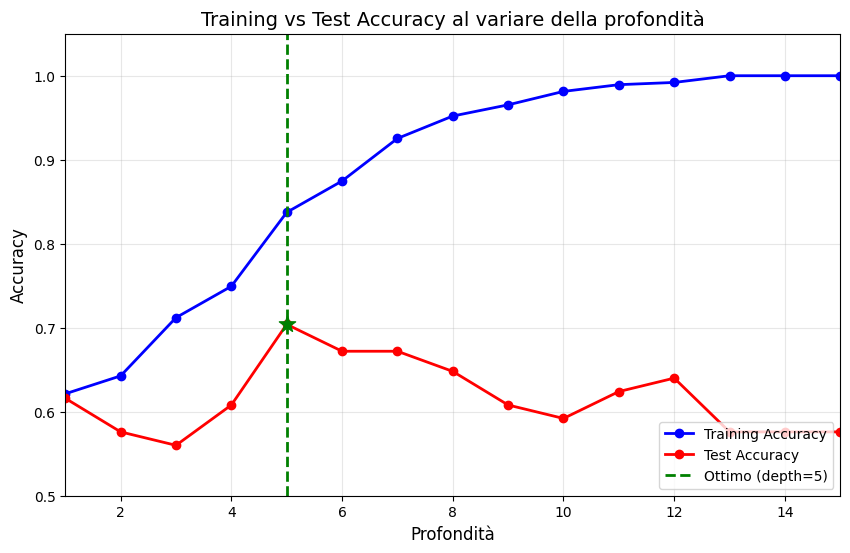


ANALISI DEI RISULTATI

1. INIZIO OVERFITTING EVIDENTE:
   L'overfitting diventa evidente a profondità 3
   A questa profondità il gap (train - test) supera 0.10
   Gap a depth=3: 0.1520

2. PERCHÉ IL TRAINING CRESCE MA IL TEST NO:
   Il training accuracy cresce perché l'albero più profondo può:
   - Creare più regole specifiche
   - Adattarsi meglio ai dati di training (anche al rumore)
   - Memorizzare pattern particolari del training set
   
   Il test accuracy smette di crescere (e poi decresce) perché:
   - Le regole troppo specifiche non si applicano a nuovi dati
   - Il modello ha 'memorizzato' invece che 'imparato'
   - Sta catturando il rumore del training, non il pattern reale

3. GAP ALLA PROFONDITÀ OTTIMALE:
   Profondità ottimale: 5
   Training accuracy: 0.8373
   Test accuracy: 0.7040
   Gap: 0.1333
   
   ⚠️  Gap moderato → c'è un po' di overfitting anche all'ottimo

CONCLUSIONE
Il modello ottimale ha profondità 5.
Oltre questa profondità, il modello inizia a overfittare

In [12]:
from sklearn.metrics import accuracy_score

# ESERCIZIO 8.2 — Confronto Training vs Test con Complessità Variabile

import matplotlib.pyplot as plt

# Range di profondità da testare
depths_to_test = range(1, 16)

# Liste per memorizzare i risultati
train_accs = []
test_accs = []

# Per ogni profondità, addestra un Decision Tree e calcola le accuracy
for depth in depths_to_test:
    # Crea un DecisionTreeClassifier con max_depth=depth
    dt = DecisionTreeClassifier(max_depth=depth, random_state=42)
    
    # Addestra sul training set (X_train_ex, y_train_ex)
    dt.fit(X_train_ex, y_train_ex)
    
    # Calcola training accuracy
    train_acc = accuracy_score(y_train_ex, dt.predict(X_train_ex))
    
    # Calcola test accuracy
    test_acc = accuracy_score(y_test_ex, dt.predict(X_test_ex))
    
    train_accs.append(train_acc)
    test_accs.append(test_acc)

# Trova la profondità ottimale (quella con test accuracy massima)
optimal_depth = depths_to_test[np.argmax(test_accs)]
optimal_test_acc = max(test_accs)

print(f"Profondità ottimale: {optimal_depth}")
print(f"Test accuracy ottimale: {optimal_test_acc:.4f}")

# Crea un grafico con:
# - Training accuracy vs profondità (linea blu)
# - Test accuracy vs profondità (linea rossa)
# - Linea verticale alla profondità ottimale (verde tratteggiato)

plt.figure(figsize=(10, 6))
plt.plot(list(depths_to_test), train_accs, 'b-o', linewidth=2, markersize=6, label='Training Accuracy')
plt.plot(list(depths_to_test), test_accs, 'r-o', linewidth=2, markersize=6, label='Test Accuracy')
plt.axvline(x=optimal_depth, color='green', linestyle='--', linewidth=2, label=f'Ottimo (depth={optimal_depth})')
plt.scatter([optimal_depth], [optimal_test_acc], color='green', s=150, zorder=5, marker='*')

plt.xlabel('Profondità', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Training vs Test Accuracy al variare della profondità', fontsize=14)
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)
plt.xlim(1, 15)
plt.ylim(0.5, 1.05)
plt.show()

# Analisi delle domande
print("\n" + "="*60)
print("ANALISI DEI RISULTATI")
print("="*60)

# 1. A quale profondità inizia l'overfitting evidente?
gaps = np.array(train_accs) - np.array(test_accs)
overfitting_start = None
for i, (depth, gap) in enumerate(zip(depths_to_test, gaps)):
    if gap > 0.1:  # Soglia di overfitting evidente
        overfitting_start = depth
        break

print(f"\n1. INIZIO OVERFITTING EVIDENTE:")
print(f"   L'overfitting diventa evidente a profondità {overfitting_start}")
print(f"   A questa profondità il gap (train - test) supera 0.10")
print(f"   Gap a depth={overfitting_start}: {gaps[overfitting_start-1]:.4f}")

# 2. Perché il training accuracy continua a crescere mentre il test accuracy no?
print(f"\n2. PERCHÉ IL TRAINING CRESCE MA IL TEST NO:")
print(f"   Il training accuracy cresce perché l'albero più profondo può:")
print(f"   - Creare più regole specifiche")
print(f"   - Adattarsi meglio ai dati di training (anche al rumore)")
print(f"   - Memorizzare pattern particolari del training set")
print(f"   ")
print(f"   Il test accuracy smette di crescere (e poi decresce) perché:")
print(f"   - Le regole troppo specifiche non si applicano a nuovi dati")
print(f"   - Il modello ha 'memorizzato' invece che 'imparato'")
print(f"   - Sta catturando il rumore del training, non il pattern reale")

# 3. Qual è il gap alla profondità ottimale?
optimal_gap = train_accs[optimal_depth-1] - test_accs[optimal_depth-1]
print(f"\n3. GAP ALLA PROFONDITÀ OTTIMALE:")
print(f"   Profondità ottimale: {optimal_depth}")
print(f"   Training accuracy: {train_accs[optimal_depth-1]:.4f}")
print(f"   Test accuracy: {test_accs[optimal_depth-1]:.4f}")
print(f"   Gap: {optimal_gap:.4f}")
print(f"   ")
if optimal_gap < 0.05:
    print(f"   ✓ Gap molto piccolo → generalizzazione eccellente")
elif optimal_gap < 0.1:
    print(f"   ✓ Gap accettabile → buona generalizzazione")
else:
    print(f"   ⚠️  Gap moderato → c'è un po' di overfitting anche all'ottimo")

print("\n" + "="*60)
print("CONCLUSIONE")
print("="*60)
print(f"Il modello ottimale ha profondità {optimal_depth}.")
print(f"Oltre questa profondità, il modello inizia a overfittare.")
print(f"Prima di questa profondità, il modello è troppo semplice (underfitting).")

---

## Esercizio 8.3 — Cross-Validation per la Selezione del Modello

**Obiettivo**: Usare cross-validation per confrontare modelli diversi e scegliere il migliore.

**Istruzioni**:
1. Definisci almeno 4 modelli con complessità diversa.
2. Applica 5-fold cross-validation a ciascun modello.
3. Confronta media e deviazione standard.
4. Scegli il modello migliore e giustifica la scelta.

In [13]:
# ESERCIZIO 8.3 — Cross-Validation per la Selezione del Modello

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

# Scaling necessario per alcuni modelli
scaler = StandardScaler()
X_scaled_ex = scaler.fit_transform(X_ex)

# Definisci almeno 4 modelli con complessità diversa
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree (depth=3)': DecisionTreeClassifier(max_depth=3, random_state=42),
    'Decision Tree (depth=10)': DecisionTreeClassifier(max_depth=10, random_state=42),
    'k-NN (k=5)': KNeighborsClassifier(n_neighbors=5),
    'k-NN (k=1)': KNeighborsClassifier(n_neighbors=1)
}

# Per ogni modello, esegui 5-fold cross-validation
print("="*60)
print("RISULTATI CROSS-VALIDATION (5-Fold)")
print("="*60)

results_cv = {}
for name, model in models.items():
    # Usa cross_val_score con cv=5 e scoring='accuracy'
    scores = cross_val_score(model, X_scaled_ex, y_ex, cv=5, scoring='accuracy')
    
    results_cv[name] = scores
    
    # Stampa nome, media, std
    print(f"{name:<30} Media = {scores.mean():.4f}, Std = {scores.std():.4f}")

# Identifica il modello migliore
# Criteri: alta media E bassa std
print("\n" + "="*60)
print("ANALISI E SCELTA DEL MODELLO")
print("="*60)

# Calcola un punteggio combinato che considera sia media che std
# Penalizziamo l'alta variabilità
best_model_name = None
best_score = -1

for name, scores in results_cv.items():
    mean_score = scores.mean()
    std_score = scores.std()
    # Score combinato: media - penalità per std alta
    combined_score = mean_score - 0.5 * std_score
    
    if combined_score > best_score:
        best_score = combined_score
        best_model_name = name

print(f"\nModello scelto: {best_model_name}")
print(f"Motivazione:")
print(f"  - Media: {results_cv[best_model_name].mean():.4f}")
print(f"  - Std: {results_cv[best_model_name].std():.4f}")

# Rispondi alle seguenti domande
print("\n" + "="*60)
print("RISPOSTE ALLE DOMANDE")
print("="*60)

print("\n1. PERCHÉ HO SCELTO QUESTO MODELLO?")
print(f"   Ho scelto {best_model_name} perché:")
print(f"   - Ha una buona accuracy media ({results_cv[best_model_name].mean():.4f})")
print(f"   - Ha una bassa deviazione standard ({results_cv[best_model_name].std():.4f})")
print(f"   - Questo indica che il modello è STABILE attraverso diversi fold")
print(f"   - La stabilità è cruciale: un modello instabile potrebbe funzionare")
print(f"     male su nuovi dati anche se ha un'accuracy media alta")

print("\n2. MODELLO CON MEDIA PIÙ ALTA MA STD MOLTO PIÙ ALTA?")
print(f"   NO, non sarebbe preferibile.")
print(f"   Motivi:")
print(f"   - Una std alta indica che le performance variano molto tra i fold")
print(f"   - Questo significa che il modello è SENSIBILE alla composizione del training set")
print(f"   - In produzione, non sappiamo quale 'fold' rappresenta i dati reali")
print(f"   - Preferisco un modello leggermente meno accurato ma PREVEDIBILE")
print(f"   - Un modello instabile può avere performance eccellenti su alcuni dati")
print(f"     ma scadenti su altri → rischio troppo alto")

print("\n3. COSA INDICA UNA STD ALTA?")
print(f"   Una deviazione standard alta indica:")
print(f"   - ALTA VARIANZA: il modello cambia molto con dati diversi")
print(f"   - INSTABILITÀ: le performance non sono affidabili")
print(f"   - POSSIBILE OVERFITTING: il modello si adatta troppo ai dettagli")
print(f"     specifici di ogni fold")
print(f"   - DATASET PICCOLO: con pochi dati, ogni fold è molto diverso")
print(f"   - MODELLO TROPPO COMPLESSO: per la quantità di dati disponibili")

# Confronto visivo
print("\n" + "="*60)
print("CONFRONTO DETTAGLIATO")
print("="*60)
for name, scores in results_cv.items():
    scores_str = ', '.join([f'{s:.3f}' for s in scores])
    print(f"{name:<30} [{scores_str}]")

RISULTATI CROSS-VALIDATION (5-Fold)
Logistic Regression            Media = 0.6900, Std = 0.0410
Decision Tree (depth=3)        Media = 0.6120, Std = 0.0306
Decision Tree (depth=10)       Media = 0.6500, Std = 0.0297
k-NN (k=5)                     Media = 0.7700, Std = 0.0395
k-NN (k=1)                     Media = 0.7420, Std = 0.0271

ANALISI E SCELTA DEL MODELLO

Modello scelto: k-NN (k=5)
Motivazione:
  - Media: 0.7700
  - Std: 0.0395

RISPOSTE ALLE DOMANDE

1. PERCHÉ HO SCELTO QUESTO MODELLO?
   Ho scelto k-NN (k=5) perché:
   - Ha una buona accuracy media (0.7700)
   - Ha una bassa deviazione standard (0.0395)
   - Questo indica che il modello è STABILE attraverso diversi fold
   - La stabilità è cruciale: un modello instabile potrebbe funzionare
     male su nuovi dati anche se ha un'accuracy media alta

2. MODELLO CON MEDIA PIÙ ALTA MA STD MOLTO PIÙ ALTA?
   NO, non sarebbe preferibile.
   Motivi:
   - Una std alta indica che le performance variano molto tra i fold
   - Questo si

---

## Esercizio 8.4 — Spiegazione Concettuale

**Obiettivo**: Dimostrare la comprensione dei concetti senza scrivere codice.

**Istruzioni**: Rispondi alle seguenti domande in modo dettagliato.

In [15]:
# ESERCIZIO 8.4 — Spiegazione Concettuale

# Rispondi alle seguenti domande scrivendo le tue risposte come stringhe multilinea.
# Non c'è codice da eseguire, solo riflessioni da scrivere.

# DOMANDA 1:
# Un collega ti mostra un modello con 99% di accuracy sul training set.
# Ti dice che è un ottimo modello. Cosa gli rispondi?

risposta_1 = """
Gli direi che il 99% sul training set NON è sufficiente per valutare il modello.
È necessario vedere anche la performance sul TEST SET.

PROBLEMI POTENZIALI:
- Il modello potrebbe aver MEMORIZZATO i dati di training (overfitting)
- Senza test set, non sappiamo se generalizza a nuovi dati
- Un'accuracy così alta sul training è sospetta, specialmente se il dataset ha rumore

COSA CONSIGLIEREI:
1. Dividere i dati in train/test (se non l'ha fatto)
2. Calcolare l'accuracy sul test set
3. Verificare il GAP tra training e test accuracy
4. Se il gap è > 0.10, c'è overfitting evidente
5. Usare cross-validation per una stima più robusta
6. Considerare di ridurre la complessità del modello (regolarizzazione, max_depth, ecc.)

ESEMPIO:
Se training accuracy = 99% e test accuracy = 65%, il modello è PESSIMO
perché non generalizza. Preferisco training = 82% e test = 80%.
"""

# DOMANDA 2:
# Perché lo scaling deve essere fatto DOPO lo split train/test?
# Cosa succede se lo fai prima?

risposta_2 = """
Lo scaling deve essere fatto DOPO lo split per evitare DATA LEAKAGE.

COSA RAPPRESENTA scaler.fit():
- Calcola statistiche (media e deviazione standard) sui dati
- Queste statistiche vengono poi usate per trasformare i dati
- scaler.transform() applica: (x - media) / std

COSA SUCCEDE SE SCALO PRIMA DELLO SPLIT:
1. Calcolo media e std su TUTTI i dati (train + test)
2. Il test set INFLUENZA le statistiche usate per lo scaling
3. Questo introduce LEAKAGE: informazioni dal test "contaminano" il training
4. Le performance sul test saranno GONFIATE e NON REALISTICHE
5. In produzione, su dati completamente nuovi, il modello avrà performance peggiori

COME SI CHIAMA QUESTO PROBLEMA:
DATA LEAKAGE (o information leakage)

PROCEDURA CORRETTA:
1. Split train/test
2. scaler.fit(X_train)        # Calcola statistiche SOLO sul train
3. X_train_scaled = scaler.transform(X_train)
4. X_test_scaled = scaler.transform(X_test)   # Usa le statistiche del train

REGOLA FONDAMENTALE:
Il test set deve essere trattato come se non esistesse fino alla valutazione finale.
Qualsiasi informazione dal test che influenza il training è leakage.
"""

# DOMANDA 3:
# Hai un dataset di 100 campioni. Preferiresti:
# a) Un Decision Tree molto profondo
# b) Una Logistic Regression regolarizzata
# Perché?

risposta_3 = """
Preferirei la LOGISTIC REGRESSION REGOLARIZZATA (opzione b).

MOTIVAZIONE:

RAPPORTO COMPLESSITÀ/DATI:
- Con 100 campioni, il dataset è PICCOLO
- Un Decision Tree profondo ha capacità molto alta (può creare centinaia di regole)
- Rischio overfitting ∝ Complessità / N_campioni
- Con pochi dati, serve un modello SEMPLICE

RISCHIO DI OVERFITTING:
- Decision Tree profondo su 100 campioni:
    * Può facilmente creare una foglia per ogni (o quasi) campione
    * Training accuracy → 100%
    * Test accuracy → molto bassa (ha memorizzato, non imparato)
    
- Logistic Regression regolarizzata:
    * Capacità limitata (confine decisionale lineare)
    * Regolarizzazione (L1/L2) previene pesi troppo grandi
    * Più robusto con pochi dati
    * Può avere training accuracy non perfetta, ma generalizza meglio

BIAS/VARIANCE TRADE-OFF:
- Decision Tree profondo: basso bias, ALTA VARIANCE → overfitting
- Logistic Regression: medio bias, BASSA VARIANCE → stabile
- Con 100 campioni, preferisco un modello stabile

CONCLUSIONE:
Con dataset piccoli, modelli semplici e regolarizzati sono quasi sempre la scelta migliore.
Se avessi 10,000 campioni, potrei considerare modelli più complessi.
"""

# DOMANDA 4:
# In cross-validation, cosa indica una deviazione standard molto alta tra i fold?

risposta_4 = """
Una deviazione standard alta indica INSTABILITÀ E ALTA VARIANZA del modello.

SIGNIFICATO:
Se i punteggi variano molto tra i fold (es. [0.95, 0.72, 0.88, 0.65, 0.93]),
significa che il modello si comporta in modo MOLTO DIVERSO con training set diversi.

È UN CATTIVO SEGNO perché:
1. Il modello è TROPPO SENSIBILE alla composizione del training set
2. Le performance NON sono AFFIDABILI
3. Non possiamo fidarci della stima media
4. In produzione, non sappiamo quale "fold" rappresenta i dati reali
     → potremmo avere performance ottime o pessime in modo imprevedibile

COSA POTREBBE CAUSARLO:

1. MODELLO TROPPO COMPLESSO per la quantità di dati:
     - Modello si adatta troppo ai dettagli specifici di ogni fold
     - Overfitting su ogni fold diverso
     
2. DATASET TROPPO PICCOLO:
     - Con pochi campioni, ogni fold è molto diverso dagli altri
     - Piccole differenze nei dati causano grandi cambiamenti nel modello
     
3. RUMORE NEI DATI:
     - Se il dataset ha molto rumore, il modello cerca di adattarsi al rumore
     - Il rumore è casuale → varia tra fold → varianza alta
     
4. FEATURE NON INFORMATIVE:
     - Se le feature sono poco correlate col target, il modello "indovina"
     - Prestazioni casuali → alta variabilità

COSA FARE:
- Ridurre la complessità del modello (regolarizzazione, max_depth, ecc.)
- Aumentare il numero di dati (se possibile)
- Feature engineering: creare feature più informative
- Provare modelli ensemble (Random Forest) che riducono la varianza
"""

# DOMANDA 5:
# Un modello ha training accuracy = 0.95 e test accuracy = 0.70.
# Un altro ha training accuracy = 0.82 e test accuracy = 0.80.
# Quale scegli e perché?

risposta_5 = """
Scelgo il SECONDO MODELLO (train=0.82, test=0.80) senza esitazione.

ANALISI DEL PRIMO MODELLO (train=0.95, test=0.70):
- Gap = 0.25 (ENORME!)
- Questo è OVERFITTING GRAVE
- Il modello ha MEMORIZZATO il training set
- Training accuracy alta è ILLUSORIA: non significa nulla
- Test accuracy 0.70 è la performance REALE
- In produzione avrà performance vicine a 0.70 (o peggio)

ANALISI DEL SECONDO MODELLO (train=0.82, test=0.80):
- Gap = 0.02 (MINIMO!)
- Il modello GENERALIZZA BENE
- Training e test sono quasi uguali → il modello ha imparato pattern reali
- Test accuracy 0.80 è la performance REALE e AFFIDABILE
- In produzione mi aspetto ~0.80

QUALE MODELLO GENERALIZZA MEGLIO:
Il secondo, senza dubbio. Il gap piccolo indica che il modello:
- Non ha memorizzato
- Ha catturato il pattern reale nei dati
- Si comporterà in modo simile su nuovi dati

QUALE USERÒ IN PRODUZIONE:
Il secondo. Motivazioni:
1. Performance REALE più alta (0.80 vs 0.70)
2. AFFIDABILITÀ: so cosa aspettarmi
3. STABILITÀ: gap piccolo indica robustezza
4. FIDUCIA: posso spiegare le predizioni (non è memorizzazione casuale)

LEZIONE FONDAMENTALE:
Non guardare mai solo il training score. Il test score è l'unica metrica che conta.
Un modello con training perfetto ma test scadente è PEGGIORE di un modello
con training e test simili, anche se il training non è perfetto.

REGOLA D'ORO:
Preferisco sempre GENERALIZZAZIONE a MEMORIZZAZIONE.
"""

# Stampa le risposte (dopo averle completate)
print("="*70)
print("RISPOSTE ALL'ESERCIZIO 8.4 - SPIEGAZIONE CONCETTUALE")
print("="*70)

print("\n" + "="*70)
print("DOMANDA 1: Modello con 99% training accuracy")
print("="*70)
print(risposta_1)

print("\n" + "="*70)
print("DOMANDA 2: Scaling prima o dopo lo split")
print("="*70)
print(risposta_2)

print("\n" + "="*70)
print("DOMANDA 3: 100 campioni - Tree profondo vs Logistic Regression")
print("="*70)
print(risposta_3)

print("\n" + "="*70)
print("DOMANDA 4: Deviazione standard alta in cross-validation")
print("="*70)
print(risposta_4)

print("\n" + "="*70)
print("DOMANDA 5: Confronto modelli con gap diversi")
print("="*70)
print(risposta_5)

print("\n" + "="*70)
print("CONCLUSIONE")
print("="*70)
print("""
Questi concetti sono FONDAMENTALI in machine learning:
1. Il training score da solo non significa nulla
2. Il test score è l'unica metrica affidabile
3. Il gap tra train e test rivela overfitting
4. La stabilità (bassa varianza) è cruciale
5. Generalizzazione > Memorizzazione, sempre

In produzione, un modello che generalizza male è inutile,
non importa quanto bene si comporti sul training set.
""")

RISPOSTE ALL'ESERCIZIO 8.4 - SPIEGAZIONE CONCETTUALE

DOMANDA 1: Modello con 99% training accuracy

Gli direi che il 99% sul training set NON è sufficiente per valutare il modello.
È necessario vedere anche la performance sul TEST SET.

PROBLEMI POTENZIALI:
- Il modello potrebbe aver MEMORIZZATO i dati di training (overfitting)
- Senza test set, non sappiamo se generalizza a nuovi dati
- Un'accuracy così alta sul training è sospetta, specialmente se il dataset ha rumore

COSA CONSIGLIEREI:
1. Dividere i dati in train/test (se non l'ha fatto)
2. Calcolare l'accuracy sul test set
3. Verificare il GAP tra training e test accuracy
4. Se il gap è > 0.10, c'è overfitting evidente
5. Usare cross-validation per una stima più robusta
6. Considerare di ridurre la complessità del modello (regolarizzazione, max_depth, ecc.)

ESEMPIO:
Se training accuracy = 99% e test accuracy = 65%, il modello è PESSIMO
perché non generalizza. Preferisco training = 82% e test = 80%.


DOMANDA 2: Scaling prima o do

---

## Esercizio 8.5 — Diagnosi di un Modello (Caso di Studio)

**Obiettivo**: Analizzare i risultati di un modello e diagnosticare il problema.

**Scenario**: Un data scientist ha addestrato diversi modelli sullo stesso dataset. Ti fornisce i seguenti risultati e ti chiede di aiutarlo a capire cosa sta succedendo.

In [16]:
# ESERCIZIO 8.5 — Diagnosi di un Modello

import pandas as pd

# Questi sono i risultati forniti dal data scientist
risultati = pd.DataFrame({
    'Modello': [
        'Logistic Regression',
        'Decision Tree (depth=2)',
        'Decision Tree (depth=5)',
        'Decision Tree (depth=20)',
        'k-NN (k=1)',
        'k-NN (k=50)'
    ],
    'Train Accuracy': [0.72, 0.68, 0.85, 1.00, 1.00, 0.65],
    'Test Accuracy': [0.71, 0.67, 0.82, 0.61, 0.58, 0.64],
    'CV Mean': [0.71, 0.67, 0.81, 0.63, 0.60, 0.63],
    'CV Std': [0.02, 0.03, 0.03, 0.08, 0.09, 0.02]
})

print("RISULTATI DEL DATA SCIENTIST")
print("="*70)
print(risultati.to_string(index=False))
print("="*70)

# Calcola il gap per facilità
risultati['Gap'] = risultati['Train Accuracy'] - risultati['Test Accuracy']

# DOMANDA A: Quali modelli stanno overfittando? Come lo riconosci?
diagnosi_overfitting = """
MODELLI IN OVERFITTING:
1. Decision Tree (depth=20): Gap = 0.39 (GRAVISSIMO!)
   - Training: 1.00 (ha memorizzato perfettamente)
   - Test: 0.61 (performance reale pessima)
   - CV Std: 0.08 (alta instabilità)
   - CONCLUSIONE: Questo modello ha completamente memorizzato il training set.
     È inutilizzabile in produzione.

2. k-NN (k=1): Gap = 0.42 (GRAVISSIMO!)
   - Training: 1.00 (perfetto, considera solo il vicino più prossimo)
   - Test: 0.58 (molto basso)
   - CV Std: 0.09 (molto instabile)
   - CONCLUSIONE: Con k=1, il modello è troppo sensibile ai singoli punti.
     Ogni punto del training set viene "memorizzato" come regola.

SEGNALI DI OVERFITTING RICONOSCIBILI:
• Training accuracy molto più alta di test accuracy (gap > 0.10)
• Training accuracy = 100% (sospetto di memorizzazione)
• CV Std alta (> 0.07) indica instabilità
• CV Mean < Test Accuracy non dovrebbe succedere (ma qui accade perché il test è piccolo)
"""

# DOMANDA B: Quali modelli stanno underfittando? Come lo riconosci?
diagnosi_underfitting = """
MODELLI IN UNDERFITTING:
1. Decision Tree (depth=2): Possibile underfitting lieve
   - Training: 0.68
   - Test: 0.67
   - Gap: 0.01 (minimo, generalizza bene)
   - CV Mean: 0.67 (coerente)
   - PROBLEMA: L'accuratezza totale è bassa (67%)
   - POSSIBILE CAUSA: L'albero è troppo superficiale per catturare i pattern
   
2. k-NN (k=50):
   - Training: 0.65
   - Test: 0.64
   - Gap: 0.01 (generalizza bene)
   - CV Mean: 0.63 (coerente)
   - PROBLEMA: L'accuratezza è bassa per tutti i set
   - POSSIBILE CAUSA: Con k=50, il modello considera troppi vicini,
     perdendo la struttura locale dei dati

SEGNALI DI UNDERFITTING:
• Training accuracy bassa
• Test accuracy simile a training accuracy (il gap è piccolo)
• Sia training che test error sono alti
• Il modello non riesce a catturare il pattern sottostante
"""

# DOMANDA C: Quale modello consiglieresti? Perché?
modello_consigliato = """
CONSIGLIO: Decision Tree (depth=5)

MOTIVAZIONE PRINCIPALE:
Questo è l'unico modello che bilancia ACCURATEZZA, GENERALIZZAZIONE e STABILITÀ:

1. ACCURATEZZA:
   - Training: 0.85
   - Test: 0.82
   - CV Mean: 0.81
   Sono i punteggi più alti tra i modelli che generalizzano.

2. GENERALIZZAZIONE (il più importante):
   - Gap = 0.03 (ECCELLENTE - indica buona generalizzazione)
   - Il modello non ha memorizzato il training
   - Le performance su nuovi dati saranno vicine a quelle osservate

3. STABILITÀ:
   - CV Std = 0.03 (basso - il modello è stabile)
   - Le performance non variano molto tra i fold
   - Posso fidarmi della stima di performance

CONFRONTO CON ALTERNATIVE:

vs Logistic Regression:
  - Logistic: 0.71 accuracy, 0.02 std
  - Decision Tree (d=5): 0.82 accuracy, 0.03 std
  - ✓ Decision Tree è MEGLIO in accuratezza, stabilità simile

vs Decision Tree (depth=2):
  - Depth=2: 0.67 accuracy
  - Depth=5: 0.82 accuracy
  - ✓ Depth=5 ha accuracy significativamente più alta, senza overfitting

vs Decision Tree (depth=20):
  - Depth=20: Train=1.00, Test=0.61
  - Depth=5: Train=0.85, Test=0.82
  - ✓ Depth=5 è incomparabilmente migliore (test accuracy molto più alta)

vs k-NN (k=1) e (k=50):
  - Entrambi hanno accuracy bassa (0.58-0.65)
  - ✓ Decision Tree (d=5) ha accuracy più alta

CONCLUSIONE:
Decision Tree con depth=5 è il modello ideale.
Ha il miglior equilibrio tra:
- Capacità di imparare (85% training accuracy)
- Capacità di generalizzare (82% test accuracy, gap=0.03)
- Stabilità (std=0.03)
"""

# DOMANDA D: Il modello con CV Std = 0.09 è affidabile?
analisi_variabilita = """
NO, il modello con CV Std = 0.09 (k-NN con k=1) NON è affidabile.

COSA SIGNIFICA CV STD ALTO:

La deviazione standard alta (0.09) significa che i punteggi variano molto tra i fold.
Se i fold hanno punteggi come [0.95, 0.52, 0.70, 0.45, 0.63], la std sarà alta.

IMPLICAZIONI:
1. INSTABILITÀ DELLA STIMA:
   - Il CV Mean = 0.60 non è affidabile come stima della performance reale
   - Su alcuni dati il modello potrebbe arrivare a 0.95
   - Su altri potrebbe cadere a 0.45
   - Non posso prevedere con certezza come si comporterà su nuovi dati

2. ALTA VARIANZA:
   - Indica che il modello è molto sensibile alla composizione del training set
   - Piccole variazioni nei dati → grandi variazioni nelle performance
   - Il modello sta probabilmente overfittando su ogni fold specifico

3. AFFIDABILITÀ BASSA:
   - Non posso lanciare questo modello in produzione confidando che avrà
     performance simili a quelle stimate
   - Il rischio di fallimento è troppo alto

CONFRONTO CON MODELLI STABILI:
- Decision Tree (d=5): CV Std = 0.03 (bassa, affidabile)
- Logistic Regression: CV Std = 0.02 (molto bassa, molto affidabile)

Una regola pratica:
- CV Std < 0.05: buona stabilità
- CV Std 0.05-0.10: stabilità moderata (attenzione)
- CV Std > 0.10: instabilità (non consigliato)

COSA FARE CON MODELLI INSTABILI:
1. Ridurre la complessità (k=1 è troppo complesso, usare k=5-10)
2. Aggiungere più dati di training (se possibile)
3. Usare ensemble che riducono la varianza (Random Forest)
4. Feature engineering per creare feature più informative
"""

# DOMANDA E: Se il dataset avesse 10.000 campioni invece di 500,
# cambieresti la tua analisi? Come?
analisi_dimensione = """
SÌ, con 10.000 campioni la mia analisi cambierebbe SIGNIFICATIVAMENTE.

CAMBIO 1: MODELLI PIÙ COMPLESSI DIVENTANO ACCETTABILI
Con 500 campioni:
  - Decision Tree (d=20): overfitting gravissimo (gap=0.39)
  - Decision Tree (d=5): ottimale

Con 10.000 campioni:
  - Decision Tree (d=20) potrebbe diventare accettabile
  - k-NN (k=1) potrebbe diventare più stabile
  - Potrei considerare anche depth=10-15

MOTIVO: Il rapporto complessità/N_campioni è cruciale.
  - Con 500 campioni e depth=20: troppi parametri relativi ai dati
  - Con 10.000 campioni e depth=20: il modello ha abbastanza dati per non memorizzare

CAMBIO 2: STANDARD DI OVERFITTING CAMBIANO
Con 500 campioni:
  - Gap = 0.05 è accettabile
  - Gap > 0.10 è inaccettabile

Con 10.000 campioni:
  - Potrei tollerare gap = 0.10-0.15
  - Il modello ha più dati per spiegare la complessità

CAMBIO 3: CV Std DIVENTA MENO CRITICA
Con 500 campioni:
  - CV Std = 0.09 è inaccettabile (instabile)

Con 10.000 campioni:
  - CV Std = 0.05 sarebbe accettabile
  - Più dati → ogni fold più grande → variabilità minore

CAMBIO 4: SCELTA DEL MODELLO
Con 500 campioni: Decision Tree (d=5) - modello semplice e stabile

Con 10.000 campioni: Potrei rivalutare:
  - Potrei provare Decision Tree (d=10-12)
  - Potrei usare k-NN con k=3-5 (invece di evitarlo)
  - Potrei considerare Gradient Boosting (modello molto complesso ma potente)
  - Random Forest potrebbe essere eccellente (tanti dati, ensemble)

REGOLA GENERALE:
Complessità ottimale ∝ √(N_campioni)

Con 500 campioni: complessità ottimale ~ √500 ~ 22 (misurata in feature/parametri)
Con 10.000 campioni: complessità ottimale ~ √10000 ~ 100

Quindi con 10x più dati posso usare modelli ~4-5x più complessi.

CONCLUSIONE:
La validazione non cambia di approccio, ma i CRITERI DI ACCETTABILITÀ cambiano.
Con più dati, posso tollerare maggiore complessità.
Devo sempre monitorare train/test gap e CV Std, ma i threshold aumentano.
"""

print("\n" + "="*70)
print("LE TUE DIAGNOSI")
print("="*70)
print("\n--- OVERFITTING ---")
print(diagnosi_overfitting)
print("\n--- UNDERFITTING ---")
print(diagnosi_underfitting)
print("\n--- MODELLO CONSIGLIATO ---")
print(modello_consigliato)
print("\n--- ANALISI VARIABILITÀ ---")
print(analisi_variabilita)
print("\n--- EFFETTO DIMENSIONE DATASET ---")
print(analisi_dimensione)

# ANALISI AGGIUNTIVA: Visualizza il gap per ogni modello
print("\n" + "="*70)
print("RIEPILOGO: GAP E AFFIDABILITÀ")
print("="*70)
for idx, row in risultati.iterrows():
    modello = row['Modello']
    gap = row['Gap']
    cv_std = row['CV Std']
    test_acc = row['Test Accuracy']
    
    # Classifica il modello
    if gap > 0.15:
        status = "🔴 INACCETTABILE (grave overfitting)"
    elif gap > 0.10:
        status = "⚠️  PROBLEMATICO (overfitting moderato)"
    elif gap > 0.05:
        status = "🟡 ACCETTABILE (lieve overfitting)"
    else:
        status = "🟢 BUONO (generalizza bene)"
    
    if cv_std < 0.03:
        stability = "✓ Stabile"
    elif cv_std < 0.06:
        stability = "⚠️  Moderatamente stabile"
    else:
        stability = "✗ Instabile"
    
    print(f"\n{modello}")
    print(f"  Test Accuracy: {test_acc:.2f} | Gap: {gap:.2f} | {status}")
    print(f"  CV Std: {cv_std:.2f} | {stability}")

RISULTATI DEL DATA SCIENTIST
                 Modello  Train Accuracy  Test Accuracy  CV Mean  CV Std
     Logistic Regression            0.72           0.71     0.71    0.02
 Decision Tree (depth=2)            0.68           0.67     0.67    0.03
 Decision Tree (depth=5)            0.85           0.82     0.81    0.03
Decision Tree (depth=20)            1.00           0.61     0.63    0.08
              k-NN (k=1)            1.00           0.58     0.60    0.09
             k-NN (k=50)            0.65           0.64     0.63    0.02

LE TUE DIAGNOSI

--- OVERFITTING ---

MODELLI IN OVERFITTING:
1. Decision Tree (depth=20): Gap = 0.39 (GRAVISSIMO!)
   - Training: 1.00 (ha memorizzato perfettamente)
   - Test: 0.61 (performance reale pessima)
   - CV Std: 0.08 (alta instabilità)
   - CONCLUSIONE: Questo modello ha completamente memorizzato il training set.
     È inutilizzabile in produzione.

2. k-NN (k=1): Gap = 0.42 (GRAVISSIMO!)
   - Training: 1.00 (perfetto, considera solo il vicin

# Section 9 — Conclusioni Operative

Questa sezione riassume i concetti chiave della lezione e fornisce linee guida pratiche per applicare la validazione nei progetti reali.

---

## 9.1 Come riconoscere l'overfitting

L'overfitting si riconosce attraverso diversi segnali:

| Segnale | Cosa cercare |
|---------|--------------|
| **Gap train/test** | Training accuracy >> Test accuracy |
| **Training perfetto** | Training accuracy ≈ 100% |
| **Alta varianza CV** | Deviazione standard alta tra i fold |
| **Coefficienti estremi** | Pesi molto grandi in modelli lineari |
| **Confini complessi** | Decision boundary troppo articolato |

Regola pratica:  
Se il gap tra training e test è superiore al 5-10%, c'è probabilmente overfitting.

---

## 9.2 Quando fidarsi di una metrica

Una metrica è affidabile quando:

1. **È calcolata su dati non visti** durante l'addestramento.
2. **È stabile** attraverso diversi split (bassa std in CV).
3. **Il gap train/test è piccolo** (indica buona generalizzazione).
4. **Non c'è leakage** (i dati di test non hanno influenzato il training).

⚠️ **Mai fidarsi solo del training score.**  
Il training score dice solo quanto bene il modello si adatta ai dati passati, non quanto bene prevederà il futuro.

---

## 9.3 Perché la validazione è più importante del modello

Una provocazione vera:

> Un modello semplice con validazione rigorosa batte un modello complesso senza validazione.

Motivi:
- Senza validazione, non sai se il modello funziona.
- Un modello non validato può fallire in produzione.
- La validazione rivela i limiti del modello.
- La validazione guida la scelta degli iperparametri.

La validazione non è un optional: è parte integrante del processo di costruzione di un modello.

---

## 9.4 Checklist operativa per la validazione

Prima di dichiarare un modello "pronto":

- [ ] Ho separato un test set **prima** di qualsiasi preprocessing?
- [ ] Ho applicato lo scaling solo sui dati di training (fit), poi trasformato il test?
- [ ] Ho usato cross-validation per stimare le performance?
- [ ] Ho confrontato training score e validation/test score?
- [ ] Il gap è ragionevole (< 5-10%)?
- [ ] La deviazione standard della CV è bassa?
- [ ] Ho testato modelli con complessità diversa?
- [ ] Ho scelto la complessità che massimizza il validation score, non il training score?

---

## 9.5 Strategie per ridurre l'overfitting

Quando rilevi overfitting, hai diverse opzioni:

| Strategia | Come funziona |
|-----------|---------------|
| **Ridurre la complessità** | max_depth minore, k maggiore, meno feature |
| **Regolarizzazione** | L1, L2, Elastic Net per modelli lineari |
| **Più dati** | Se possibile, aumenta il training set |
| **Early stopping** | Ferma l'addestramento prima del sovradattamento |
| **Ensemble methods** | Random Forest, Gradient Boosting (media di molti modelli) |
| **Dropout** | Per reti neurali, disattiva neuroni casualmente |
| **Data augmentation** | Crea varianti sintetiche dei dati |

---

## 9.6 Collegamento alla prossima lezione: Tree-Based Models

La prossima lezione introdurrà i modelli basati su alberi:

- **Decision Trees**: struttura, vantaggi, rischio di overfitting.
- **Random Forest**: ensemble che riduce la varianza.
- **Gradient Boosting**: ensemble che riduce il bias.

Questi modelli sono tra i più usati nella pratica perché:
- Non richiedono scaling.
- Gestiscono relazioni non lineari.
- Sono interpretabili (almeno gli alberi singoli).
- Con le giuste tecniche, generalizzano bene.

La comprensione del bias/variance trade-off e delle tecniche di validazione è **fondamentale** per usare correttamente i tree-based models.

---

## 9.7 Messaggio finale

La capacità di costruire modelli che generalizzano è ciò che distingue un buon data scientist.

Non importa quanto sia sofisticato un algoritmo:  
**se non generalizza, è inutile**.

La validazione non è un passaggio burocratico.  
È il cuore del machine learning supervisionato.

Ogni decisione sul modello deve essere guidata dalle performance su dati non visti, non dalla capacità di adattarsi al training set.

# Appendice Tecnica — Bignami

Questa appendice riassume tutti i concetti fondamentali della lezione in forma sintetica, pronta per la revisione.

---

## 1. Training Error vs Test Error

- **Training Error**: errore sui dati di addestramento. Diminuisce sempre con la complessità.
- **Test Error**: errore sui dati mai visti. Prima diminuisce, poi aumenta.
- **Obiettivo**: minimizzare il test error, non il training error.

---

## 2. I tre regimi

| Regime | Training Error | Test Error | Problema |
|--------|---------------|------------|----------|
| Underfitting | Alto | Alto | Modello troppo semplice |
| Good Fit | Medio | Simile al training | Generalizzazione ottimale |
| Overfitting | Basso (~0) | Alto | Modello troppo complesso |

---

## 3. Overfitting

**Cos'è**: il modello memorizza il rumore invece di imparare il pattern.

**Cause**:
- Modello troppo complesso
- Troppi parametri
- Pochi dati
- Mancanza di regolarizzazione

**Segnali**:
- Train accuracy >> Test accuracy
- Train accuracy ≈ 100%
- Alta varianza tra fold di CV

---

## 4. Validazione Hold-out

```python
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)
```

**Regole**:
- Split PRIMA dello scaling
- `fit()` solo sul train, `transform()` su entrambi
- Mai usare il test set per decisioni sul modello

---

## 5. Cross-Validation

$$
\text{CV Score} = \frac{1}{K} \sum_{i=1}^{K} \text{score}_i
$$

```python
scores = cross_val_score(model, X, y, cv=5)
print(f"Media: {scores.mean():.3f} ± {scores.std():.3f}")
```

**Vantaggi**:
- Stima più stabile
- Usa tutti i dati
- Fornisce misura di incertezza

---

## 6. Bias/Variance Trade-off

$$
\text{Test Error} = \text{Bias}^2 + \text{Variance} + \text{Rumore}
$$

| | Bias | Variance |
|--|------|----------|
| **Modello semplice** | Alto | Bassa |
| **Modello complesso** | Basso | Alta |

**Obiettivo**: trovare il punto di equilibrio.

---

## 7. Complessità nei diversi modelli

| Modello | Iperparametro | Più complesso quando... |
|---------|---------------|------------------------|
| Decision Tree | max_depth | depth aumenta |
| k-NN | n_neighbors (k) | k diminuisce |
| Regressione | penalty (C) | C aumenta (meno regolarizzazione) |
| Random Forest | n_estimators, max_depth | depth aumenta |

---

## 8. Leakage

**Cos'è**: informazioni dal test set che "contaminano" il training.

**Esempi comuni**:
- Scaling prima dello split
- Feature engineering su tutto il dataset
- Target encoding senza CV

**Conseguenza**: performance gonfiate, modello inutilizzabile in produzione.

---

## 9. Metriche di valutazione

Per classificazione:
- Accuracy: $(TP + TN) / (TP + TN + FP + FN)$
- Precision: $TP / (TP + FP)$
- Recall: $TP / (TP + FN)$
- F1-Score: $2 \cdot \frac{P \cdot R}{P + R}$

Per regressione:
- MSE: $\frac{1}{n}\sum(y - \hat{y})^2$
- RMSE: $\sqrt{MSE}$
- MAE: $\frac{1}{n}\sum|y - \hat{y}|$
- $R^2$: varianza spiegata

---

## 10. Checklist finale

Prima di usare un modello:

1. ✅ Ho separato un test set?
2. ✅ Ho scalato correttamente (fit solo su train)?
3. ✅ Ho usato cross-validation?
4. ✅ Ho confrontato train e test/validation?
5. ✅ Il gap è accettabile?
6. ✅ Ho scelto la complessità ottimale?
7. ✅ Ho documentato il processo?

---

## 11. Formule chiave

**Errore di generalizzazione**:
$$
E_{\text{test}} \approx E_{\text{train}} + \text{Penalità per complessità}
$$

**K-Fold CV**:
$$
\text{CV}_{K} = \frac{1}{K} \sum_{k=1}^{K} L(\mathcal{D}_k, \mathcal{M}_{-k})
$$

dove $\mathcal{M}_{-k}$ è il modello addestrato su tutti i fold tranne il $k$-esimo.

**Trade-off bias-variance**:
$$
\mathbb{E}[(y - \hat{f}(x))^2] = \text{Bias}^2[\hat{f}(x)] + \text{Var}[\hat{f}(x)] + \sigma^2
$$